# Análisis exploratorio de datos de glaciares en Argentina

Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

Lectura de datos

In [2]:
df= pd.read_csv ('https://raw.githubusercontent.com/ErikaPellegrini/Proyecto_final/refs/heads/main/Dataset/glaciar_ing.csv')

## Inspección de datos

In [3]:
print("Primeras 5 filas del dataframe")
df.head()


Primeras 5 filas del dataframe


Provincia               Cuenca                   Subcuenca Codigo_cue  \
0  Catamarca    Varias de la Puna  Antofagasta de las Sierras   K0830000   
1  Catamarca    Varias de la Puna  Antofagasta de las Sierras   K0830000   
2   La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
3   La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
4   La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   

          ID_local Tipo_geofo Nombre_com  Clas_prima  Forma  Frente  ...  \
0  G670333O263768S         ND        NaN           7    NaN     NaN  ...   
1  G670552O265877S         ND        NaN           7    NaN     NaN  ...   
2  G687787O277928S         ND        NaN           7    NaN     NaN  ...   
3  G687996O277880S         ND        NaN           7    NaN     NaN  ...   
4  G687819O278222S         ND        NaN           7    NaN     NaN  ...   

   H_min_tota  Pendiente  Orientacio  H_max_parc  H_media_pa  H_min_parc  \
0         NaN        NaN         NaN         NaN         NaN         NaN   
1         NaN        NaN         NaN         NaN         NaN         NaN   
2         NaN        NaN         NaN         NaN         NaN         NaN   
3         NaN        NaN         NaN         NaN         NaN         NaN   
4         NaN        NaN         NaN         NaN         NaN         NaN   

     Img_ba_F    Img_ba_S  Img_ap_F  Img_ap_S  
0  2020-08-13  SENTINEL-2       NaN       NaN  
1  2020-08-13  SENTINEL-2       NaN       NaN  
2  2021-01-18  SENTINEL-2       NaN       NaN  
3  2021-01-18  SENTINEL-2       NaN       NaN  
4  2021-01-18  SENTINEL-2       NaN       NaN  

[5 rows x 37 columns]

In [4]:
print(f"El dataframe cuenta con {df.shape[0]} filas y {df.shape[1]} columnas")

El dataframe cuenta con 3380 filas y 37 columnas


In [5]:
print("Información del dataframe")
print("")
df.info()

Información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3380 non-null   object 
 1   Cuenca      3380 non-null   object 
 2   Subcuenca   3380 non-null   object 
 3   Codigo_cue  3380 non-null   object 
 4   ID_local    3380 non-null   object 
 5   Tipo_geofo  3380 non-null   object 
 6   Nombre_com  32 non-null     object 
 7   Clas_prima  3380 non-null   int64  
 8   Forma       154 non-null    float64
 9   Frente      152 non-null    float64
 10  Perf_long   147 non-null    float64
 11  Fuente_ali  175 non-null    float64
 12  Act_lengua  147 non-null    float64
 13  Morena_1    139 non-null    float64
 14  Morena_2    126 non-null    float64
 15  Cob_lengua  154 non-null    float64
 16  Origen_GE   1931 non-null   float64
 17  Act_GE      1931 non-null   float64
 18  Forma_GE    1931 non-null   float64
 19  

In [6]:
# Features con todos los valores nulos
Columnas_Nan=df.columns[df.isnull().all()]

Columnas_Nan

Index(['Img_ap_F'], dtype='object')

## Limpieza



In [7]:
# Features con valores nulos

Columnas_Any=df.columns[df.isnull().any()]

Columnas_Any

Index(['Nombre_com', 'Forma', 'Frente', 'Perf_long', 'Fuente_ali',
       'Act_lengua', 'Morena_1', 'Morena_2', 'Cob_lengua', 'Origen_GE',
       'Act_GE', 'Forma_GE', 'Estruct_I', 'Estruct_II', 'Longitud', 'Latitud',
       'Area', 'Largo_tota', 'H_max_tota', 'H_media_to', 'H_min_tota',
       'Pendiente', 'Orientacio', 'H_max_parc', 'H_media_pa', 'H_min_parc',
       'Img_ap_F', 'Img_ap_S'],
      dtype='object')

In [8]:
# Filas con todos los valores Nulos
Filas_Nan=df[df.isnull().all(axis=1)]

Filas_Nan

Empty DataFrame
Columns: [Provincia, Cuenca, Subcuenca, Codigo_cue, ID_local, Tipo_geofo, Nombre_com, Clas_prima, Forma, Frente, Perf_long, Fuente_ali, Act_lengua, Morena_1, Morena_2, Cob_lengua, Origen_GE, Act_GE, Forma_GE, Estruct_I, Estruct_II, Longitud, Latitud, Area, Largo_tota, H_max_tota, H_media_to, H_min_tota, Pendiente, Orientacio, H_max_parc, H_media_pa, H_min_parc, Img_ba_F, Img_ba_S, Img_ap_F, Img_ap_S]
Index: []

[0 rows x 37 columns]

In [9]:
# Filas con algún valor nulo
Filas_Any=df[df.isnull().any(axis=1)]

Filas_Any

Provincia               Cuenca                   Subcuenca Codigo_cue  \
0     Catamarca    Varias de la Puna  Antofagasta de las Sierras   K0830000   
1     Catamarca    Varias de la Puna  Antofagasta de las Sierras   K0830000   
2      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
3      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
4      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
...         ...                  ...                         ...        ...   
3375   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3376   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3377   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3378   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3379   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   

             ID_local Tipo_geofo Nombre_com  Clas_prima  Forma  Frente  ...  \
0     G670333O263768S         ND        NaN           7    NaN     NaN  ...   
1     G670552O265877S         ND        NaN           7    NaN     NaN  ...   
2     G687787O277928S         ND        NaN           7    NaN     NaN  ...   
3     G687996O277880S         ND        NaN           7    NaN     NaN  ...   
4     G687819O278222S         ND        NaN           7    NaN     NaN  ...   
...               ...        ...        ...         ...    ...     ...  ...   
3375  G694052O296515S         GC        NaN           6    3.0     0.0  ...   
3376  G697667O300847S         GC        NaN           6    3.0     0.0  ...   
3377  G694568O296062S         MN        NaN           7    NaN     NaN  ...   
3378  G696616O300497S         MN        NaN           6    3.0     0.0  ...   
3379  G696170O300705S         GC        NaN           6    3.0     0.0  ...   

      H_min_tota  Pendiente  Orientacio  H_max_parc  H_media_pa  H_min_parc  \
0            NaN        NaN         NaN         NaN         NaN         NaN   
1            NaN        NaN         NaN         NaN         NaN         NaN   
2            NaN        NaN         NaN         NaN         NaN         NaN   
3            NaN        NaN         NaN         NaN         NaN         NaN   
4            NaN        NaN         NaN         NaN         NaN         NaN   
...          ...        ...         ...         ...         ...         ...   
3375      4953.0     19.748          SE      5089.0      5000.0      4953.0   
3376      4686.0     23.951           S      4836.0      4748.0      4686.0   
3377      5901.0      9.868           S      5931.0      5915.0      5901.0   
3378      4640.0     19.097           S      5113.0      5113.0      5112.0   
3379      4688.0     21.692           E      4839.0      4755.0      4688.0   

        Img_ba_F    Img_ba_S  Img_ap_F           Img_ap_S  
0     2020-08-13  SENTINEL-2       NaN                NaN  
1     2020-08-13  SENTINEL-2       NaN                NaN  
2     2021-01-18  SENTINEL-2       NaN                NaN  
3     2021-01-18  SENTINEL-2       NaN                NaN  
4     2021-01-18  SENTINEL-2       NaN                NaN  
...          ...         ...       ...                ...  
3375  2020-03-19  SENTINEL-2       NaN  Bing/Google Earth  
3376  2020-03-19  SENTINEL-2       NaN  Bing/Google Earth  
3377  2020-03-19  SENTINEL-2       NaN                NaN  
3378  2020-03-19  SENTINEL-2       NaN                NaN  
3379  2020-03-19  SENTINEL-2       NaN  Bing/Google Earth  

[3380 rows x 37 columns]

## Creación de nuevo data frame

Durante el proceso de limpieza y preparación de datos, se realizó la eliminación de varios features del dataset original, con el objetivo de optimizar la estructura de los datos para el análisis exploratorio y modelado posterior. Los **Features** eliminados fueron:

`Nombre_com`, `Forma, frente`, `Perf_long`, `Fuente_ali`, `Act_lengua`, `Morena_1`, `Morena_2` y `Cob_lengua`.

La decisión se fundamenta en los criterios:

* **Irrelevancia respecto al objetivo del análisis:**
el enfoque del trabajo no requiere información morfológica detallada ni descripciones específicas de las características físicas del glaciar.

*  **Bajo aporte informativo:**
 la escasa cantidad de datos disponibles en los features eliminados los vuelve datos poco relevantes, por lo cual se consideran prescindibles.




In [10]:
# Nuevo df2 con columnas eliminadas

df2=df.drop(columns=['Forma','Frente','Perf_long','Fuente_ali','Act_lengua','Morena_1','Morena_2','Cob_lengua', 'Img_ap_F','Nombre_com' ])
df2

Provincia               Cuenca                   Subcuenca Codigo_cue  \
0     Catamarca    Varias de la Puna  Antofagasta de las Sierras   K0830000   
1     Catamarca    Varias de la Puna  Antofagasta de las Sierras   K0830000   
2      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
3      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
4      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   F0520000   
...         ...                  ...                         ...        ...   
3375   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3376   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3377   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3378   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   
3379   San Juan            R. Jáchal          R. Blanco Inferior   J0530000   

             ID_local Tipo_geofo  Clas_prima  Origen_GE  Act_GE  Forma_GE  \
0     G670333O263768S         ND           7        NaN     NaN       NaN   
1     G670552O265877S         ND           7        NaN     NaN       NaN   
2     G687787O277928S         ND           7        NaN     NaN       NaN   
3     G687996O277880S         ND           7        NaN     NaN       NaN   
4     G687819O278222S         ND           7        NaN     NaN       NaN   
...               ...        ...         ...        ...     ...       ...   
3375  G694052O296515S         GC           6        NaN     NaN       NaN   
3376  G697667O300847S         GC           6        NaN     NaN       NaN   
3377  G694568O296062S         MN           7        NaN     NaN       NaN   
3378  G696616O300497S         MN           6        NaN     NaN       NaN   
3379  G696170O300705S         GC           6        NaN     NaN       NaN   

      ...  H_media_to  H_min_tota  Pendiente  Orientacio  H_max_parc  \
0     ...         NaN         NaN        NaN         NaN         NaN   
1     ...         NaN         NaN        NaN         NaN         NaN   
2     ...         NaN         NaN        NaN         NaN         NaN   
3     ...         NaN         NaN        NaN         NaN         NaN   
4     ...         NaN         NaN        NaN         NaN         NaN   
...   ...         ...         ...        ...         ...         ...   
3375  ...      5105.0      4953.0     19.748          SE      5089.0   
3376  ...      4836.0      4686.0     23.951           S      4836.0   
3377  ...      5915.0      5901.0      9.868           S      5931.0   
3378  ...      4868.0      4640.0     19.097           S      5113.0   
3379  ...      4922.0      4688.0     21.692           E      4839.0   

      H_media_pa  H_min_parc    Img_ba_F    Img_ba_S           Img_ap_S  
0            NaN         NaN  2020-08-13  SENTINEL-2                NaN  
1            NaN         NaN  2020-08-13  SENTINEL-2                NaN  
2            NaN         NaN  2021-01-18  SENTINEL-2                NaN  
3            NaN         NaN  2021-01-18  SENTINEL-2                NaN  
4            NaN         NaN  2021-01-18  SENTINEL-2                NaN  
...          ...         ...         ...         ...                ...  
3375      5000.0      4953.0  2020-03-19  SENTINEL-2  Bing/Google Earth  
3376      4748.0      4686.0  2020-03-19  SENTINEL-2  Bing/Google Earth  
3377      5915.0      5901.0  2020-03-19  SENTINEL-2                NaN  
3378      5113.0      5112.0  2020-03-19  SENTINEL-2                NaN  
3379      4755.0      4688.0  2020-03-19  SENTINEL-2  Bing/Google Earth  

[3380 rows x 27 columns]

Para mejorar la comprensión del Data Frame se procede a renombrar columnas con nombres incómodos

In [11]:
# Cambiamos los nombres incómodos

df2 = df2.rename(columns={'Codigo_cue': 'Codigo_cuenca','Tipo_geofo' :'Tipo_geoforma','Largo_tota':'Largo_total','H_max_tota':'H_max_total','H_media_to':'H_media_total','H_min_tota':'H_min_total','Orientacio':'Orientacion','H_max_parc':'H_max_parcial','H_media_pa':'H_media_parcial','H_min_parc':'H_min_parcial'})

df2.columns


Index(['Provincia', 'Cuenca', 'Subcuenca', 'Codigo_cuenca', 'ID_local',
       'Tipo_geoforma', 'Clas_prima', 'Origen_GE', 'Act_GE', 'Forma_GE',
       'Estruct_I', 'Estruct_II', 'Longitud', 'Latitud', 'Area', 'Largo_total',
       'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente',
       'Orientacion', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial',
       'Img_ba_F', 'Img_ba_S', 'Img_ap_S'],
      dtype='object')

### Iniciamos un breve análisis exploratorio de los datos luego de su primer limpieza

In [12]:
df2.describe()

Clas_prima    Origen_GE       Act_GE     Forma_GE    Estruct_I  \
count  3380.000000  1931.000000  1931.000000  1931.000000  1931.000000   
mean      8.086095     1.050751     1.655101     2.206111     1.450544   
std       1.096140     0.260556     0.475458     1.483583     0.515072   
min       2.000000     0.000000     1.000000     0.000000     0.000000   
25%       7.000000     1.000000     1.000000     1.000000     1.000000   
50%       9.000000     1.000000     2.000000     2.000000     1.000000   
75%       9.000000     1.000000     2.000000     4.000000     2.000000   
max       9.000000     3.000000     2.000000     9.000000     4.000000   

        Estruct_II     Longitud      Latitud         Area  Largo_total  \
count  1931.000000  3289.000000  3289.000000  3289.000000  2576.000000   
mean      1.790782   -67.808393   -26.945786     0.075887   423.319488   
std       0.406856     1.699664     2.389720     0.318390   503.479731   
min       1.000000   -70.018800   -30.604200     0.010000    18.000000   
25%       2.000000   -69.492600   -29.014800     0.015000   160.000000   
50%       2.000000   -68.541000   -27.269200     0.027200   271.000000   
75%       2.000000   -66.139700   -24.814700     0.057200   470.000000   
max       2.000000   -65.007000   -22.134100     9.193700  6490.000000   

       H_max_total  H_media_total  H_min_total    Pendiente  H_max_parcial  \
count  3289.000000    3289.000000  3289.000000  3289.000000    3289.000000   
mean   5097.356035    5042.888416  4990.863484    20.502710    5088.786257   
std     562.356763     554.087664   554.241019     6.735199     561.078397   
min    3517.000000    3453.000000  3362.000000     1.515000    3517.000000   
25%    4673.000000    4623.000000  4583.000000    16.049000    4667.000000   
50%    4969.000000    4911.000000  4856.000000    20.665000    4959.000000   
75%    5472.000000    5416.000000  5375.000000    25.397000    5464.000000   
max    6740.000000    6663.000000  6660.000000    42.837000    6740.000000   

       H_media_parcial  H_min_parcial  
count      3289.000000    3289.000000  
mean       5043.009121    4998.803284  
std         556.062491     555.185757  
min        3453.000000    3362.000000  
25%        4625.000000    4587.000000  
50%        4911.000000    4865.000000  
75%        5416.000000    5375.000000  
max        6680.000000    6660.000000

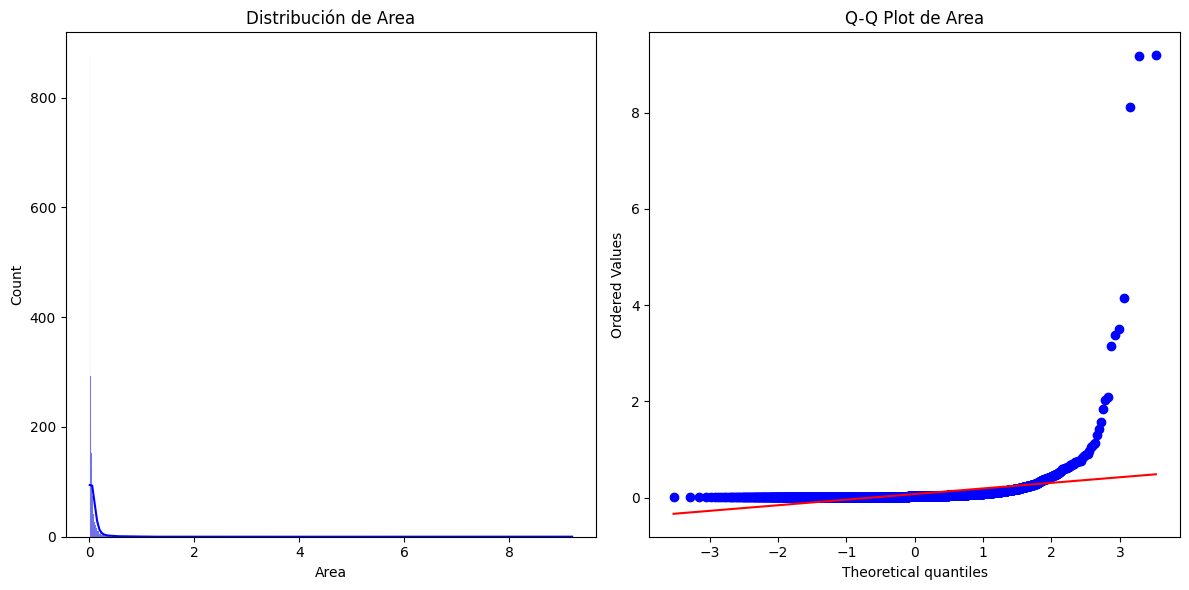

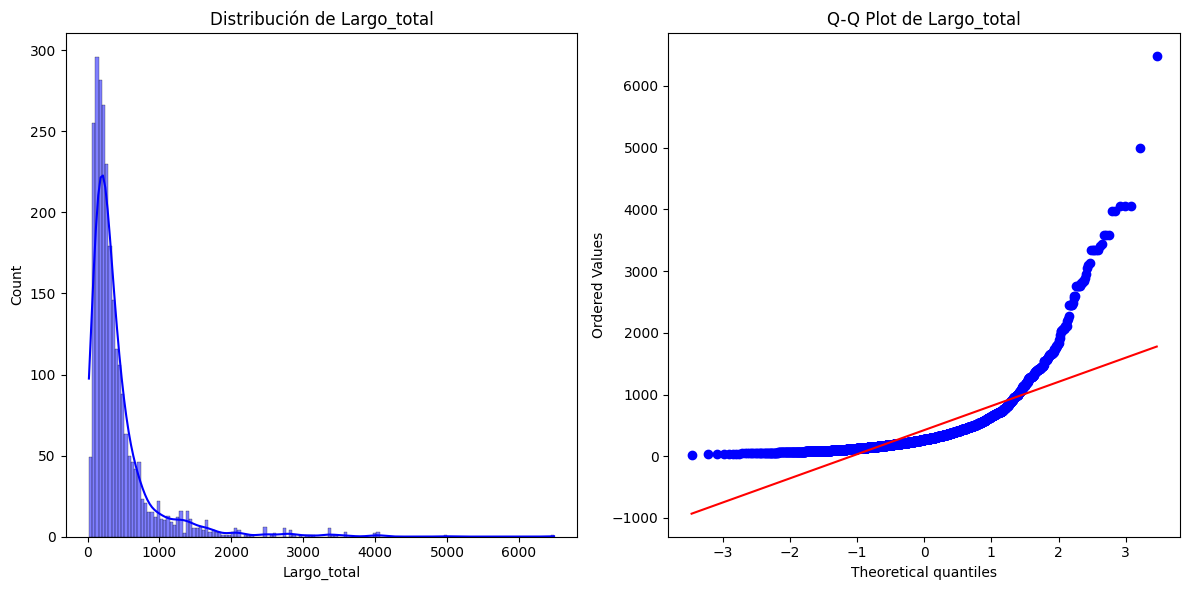

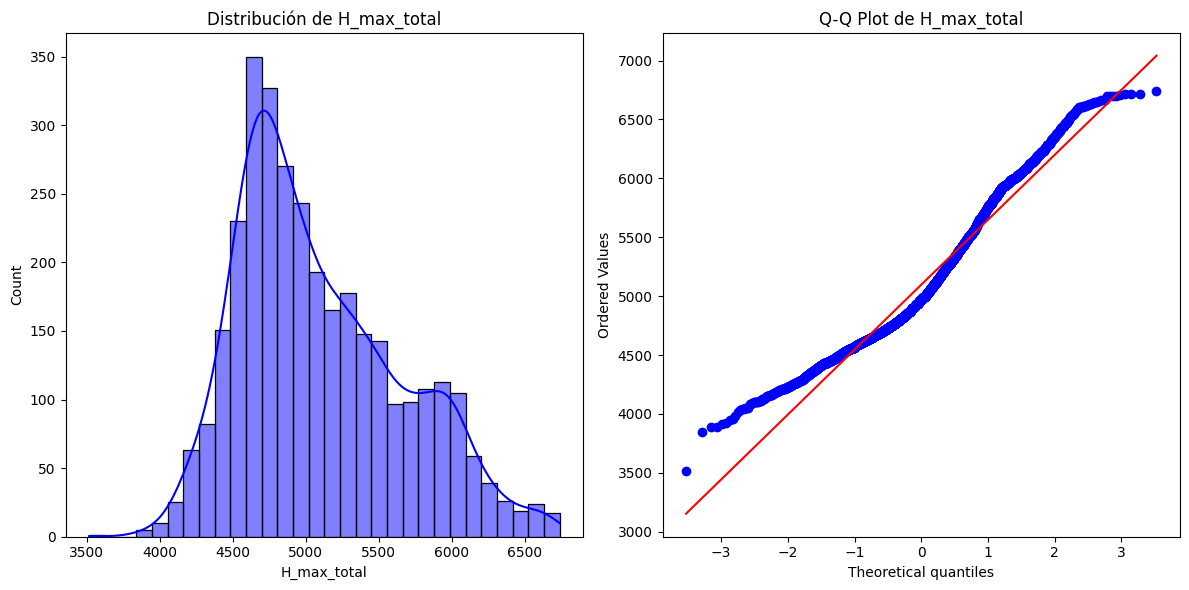

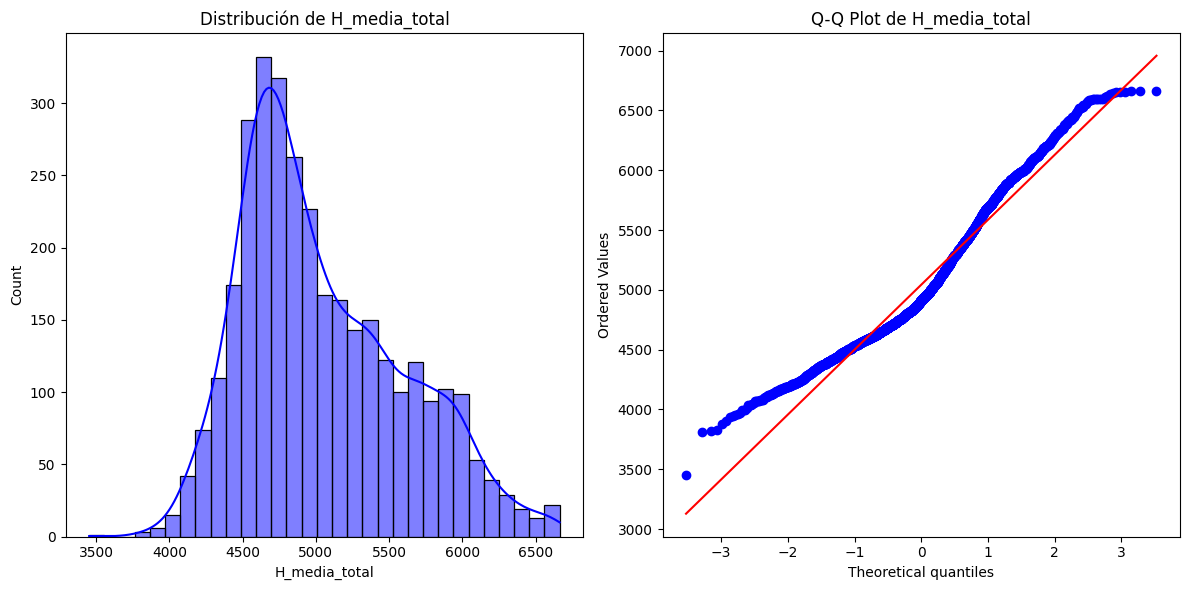

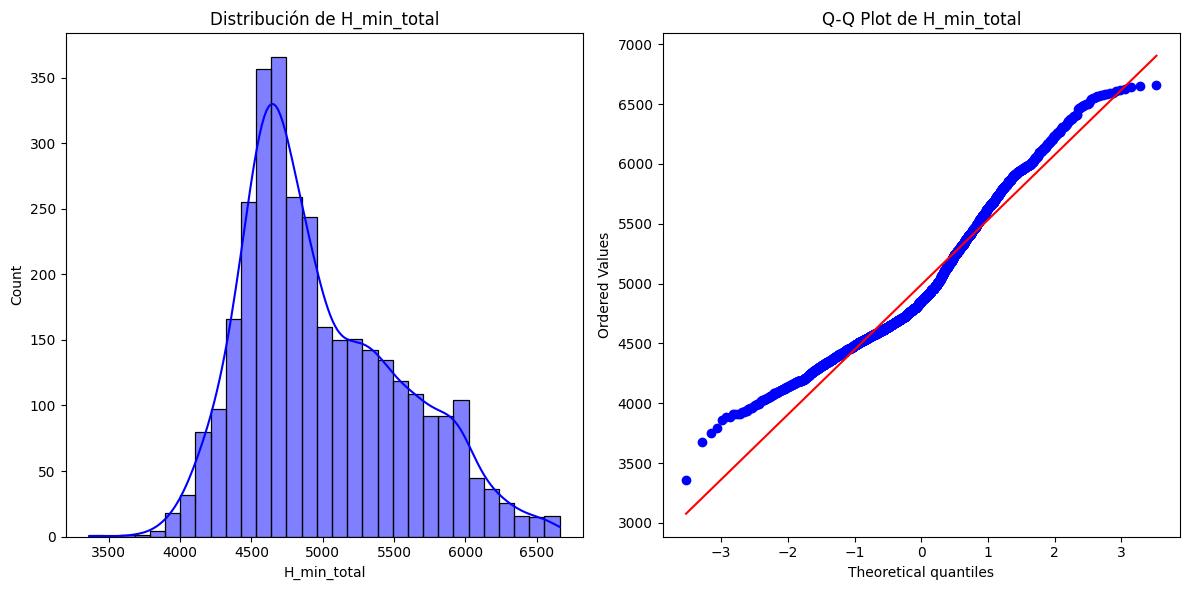

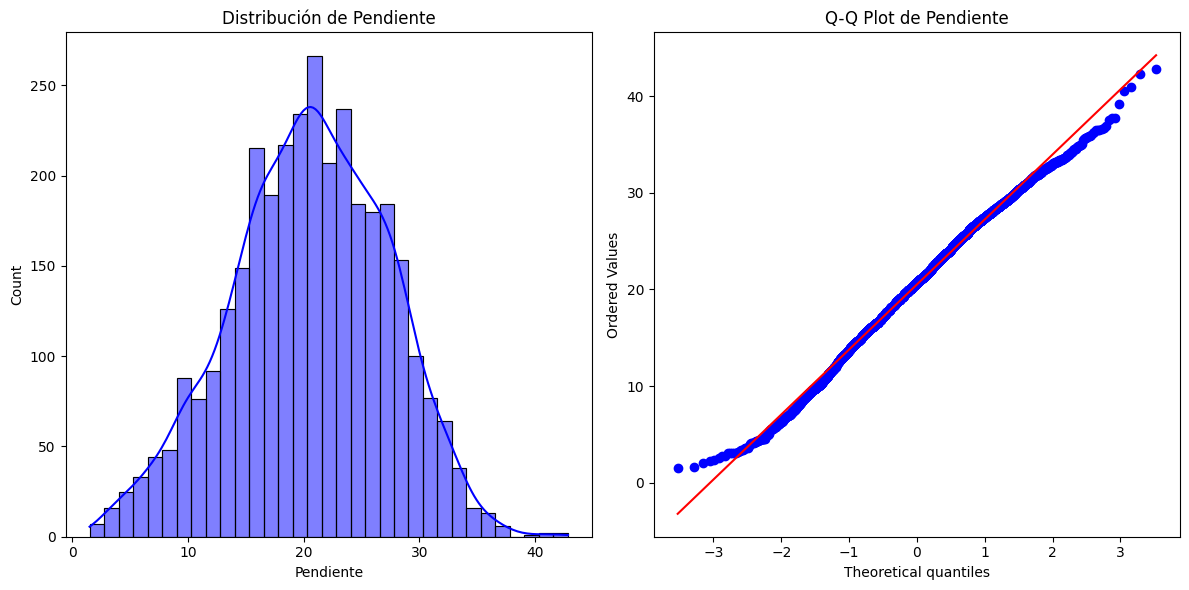

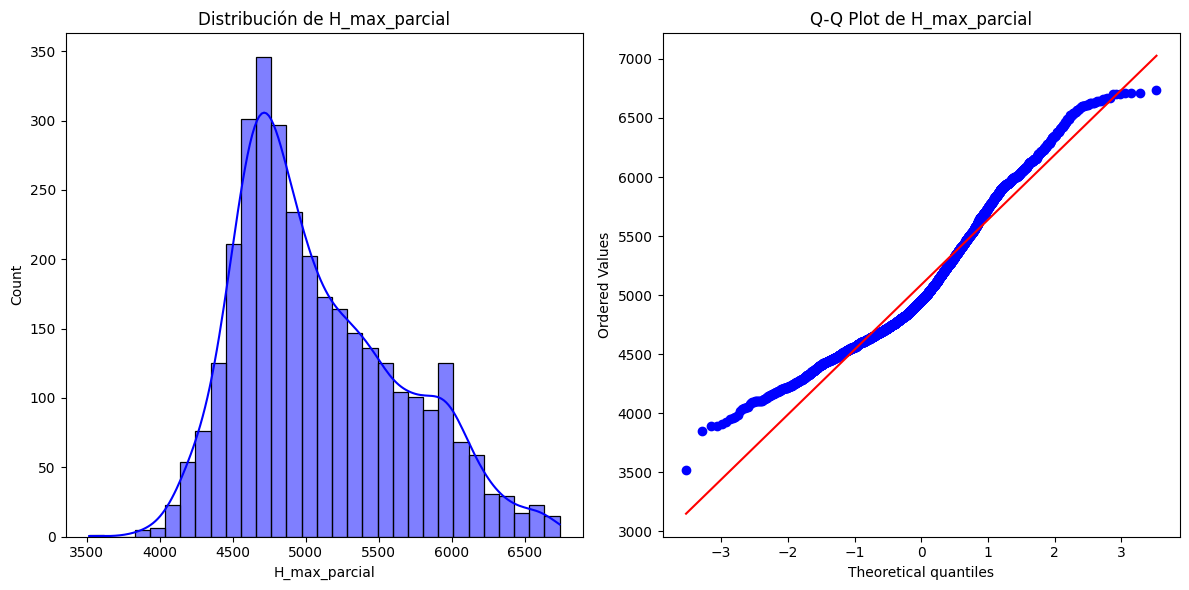

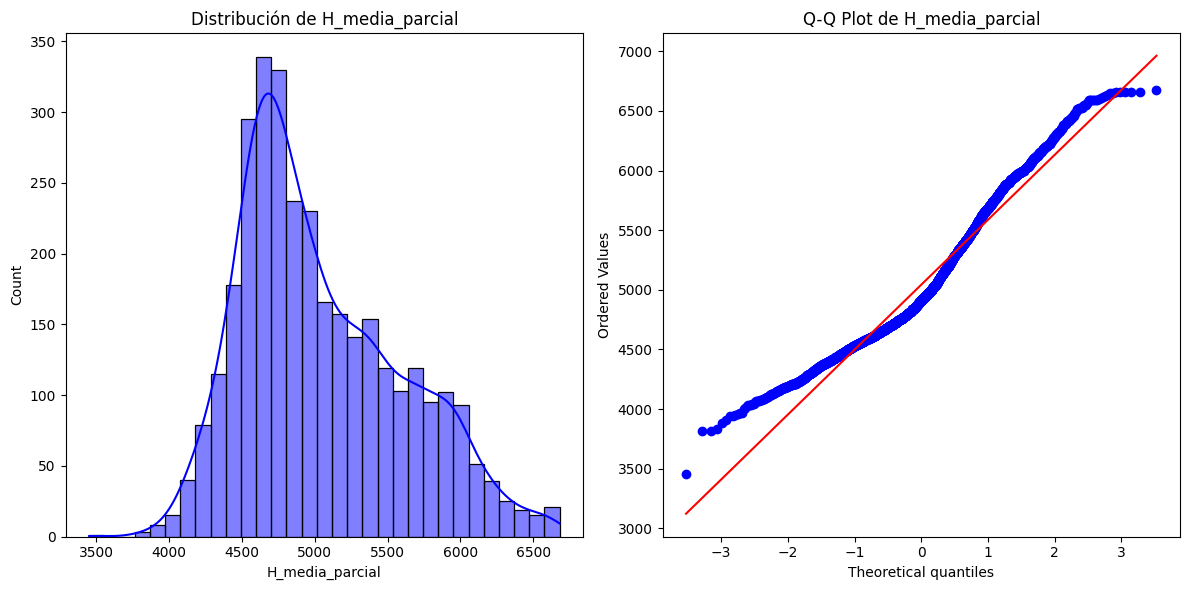

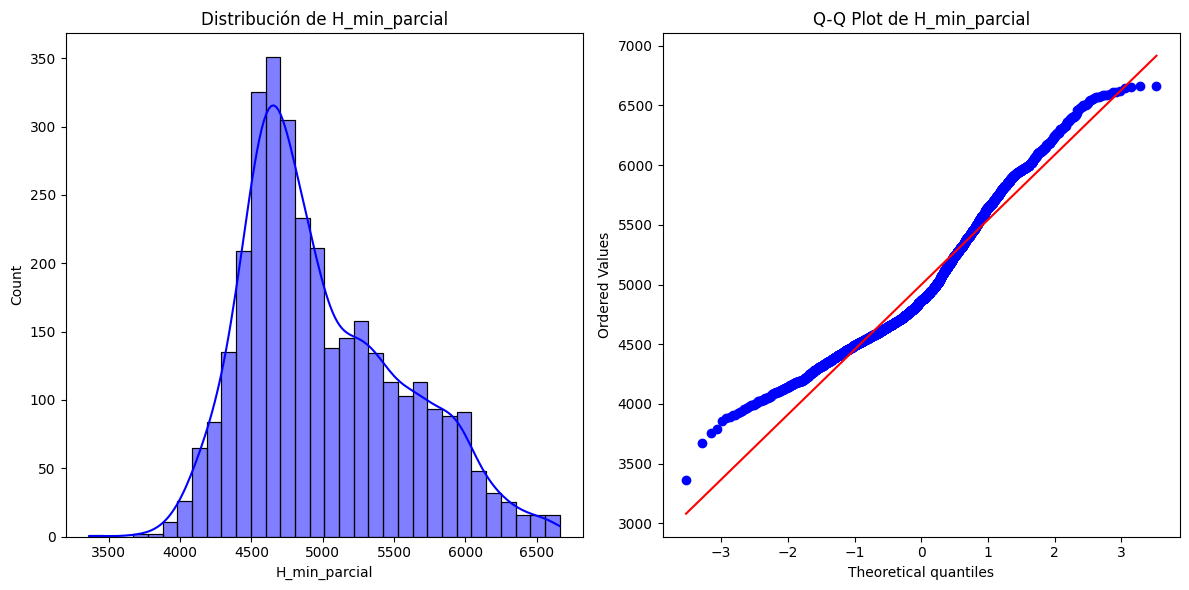

In [13]:
# Analizamos la normalidad de cada feature

numeric_features = ['Area', 'Largo_total', 'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial']

# Gráficos de distribución y Q-Q plot
def plot_distribution(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f"Distribución de {feature}")

    plt.subplot(1, 2, 2)
    stats.probplot(data[feature].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {feature}")

    plt.tight_layout()
    plt.show()

# Graficamos todas las columnas numéricas con un bucle
for feature in numeric_features:
    plot_distribution(df2, feature)


Análisis:

*   En los features "Area" y "Largo_total" se observa que la distribución de los datos de este feature está sesgada, en el Q-Q plot, los puntos se alejan en gran medida de la línea, lo que da evidencia visual de que no hay normalidad. Siendo que gran parte de los puntos se curvan hacia arriba, el sesgo es hacia la derecha.
*   El resto de features muestran una distribución cercana a la recta normal.


## Identificación y tratamiento de NaN

### Tratamiento de variables categóricas

- Los siguientes features son variables originalmente categóricas, las cuales tienen asignado valores numéricos: `Origen_GE`, `Act_GE`, `Forma_GE`, `Estruct_I` y `Estruct_II` (Ver Readme).
- Los valores faltantes (`NaN`) serán reemplazados por `-1` para representar el valor "desconocido".
- Estos registros **no** corresponden a glaciares de escombros o no están identificados; pertenecen a otras clases de glaciares como `GD`, `MN`, `GC` o `ND`.
- Pretendemos, en posteriores entregas, analizar los patrones presentes y aplicar técnicas de **Machine Learning**.

In [14]:
# Features categóricos: Origen_GE, Act_GE,Forma_GE, Estruct_I, Estruct_II

df3=df2.copy() # Creamos una copia para no reescribir el df con el que veniamos trabajando

# Reemplazo de NaN por -1
df3[['Origen_GE', 'Act_GE','Forma_GE', 'Estruct_I', 'Estruct_II']] = df3[['Origen_GE', 'Act_GE','Forma_GE', 'Estruct_I', 'Estruct_II']].fillna(-1)

df3

Provincia               Cuenca                   Subcuenca  \
0     Catamarca    Varias de la Puna  Antofagasta de las Sierras   
1     Catamarca    Varias de la Puna  Antofagasta de las Sierras   
2      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
3      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
4      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
...         ...                  ...                         ...   
3375   San Juan            R. Jáchal          R. Blanco Inferior   
3376   San Juan            R. Jáchal          R. Blanco Inferior   
3377   San Juan            R. Jáchal          R. Blanco Inferior   
3378   San Juan            R. Jáchal          R. Blanco Inferior   
3379   San Juan            R. Jáchal          R. Blanco Inferior   

     Codigo_cuenca         ID_local Tipo_geoforma  Clas_prima  Origen_GE  \
0         K0830000  G670333O263768S            ND           7       -1.0   
1         K0830000  G670552O265877S            ND           7       -1.0   
2         F0520000  G687787O277928S            ND           7       -1.0   
3         F0520000  G687996O277880S            ND           7       -1.0   
4         F0520000  G687819O278222S            ND           7       -1.0   
...            ...              ...           ...         ...        ...   
3375      J0530000  G694052O296515S            GC           6       -1.0   
3376      J0530000  G697667O300847S            GC           6       -1.0   
3377      J0530000  G694568O296062S            MN           7       -1.0   
3378      J0530000  G696616O300497S            MN           6       -1.0   
3379      J0530000  G696170O300705S            GC           6       -1.0   

      Act_GE  Forma_GE  ...  H_media_total  H_min_total  Pendiente  \
0       -1.0      -1.0  ...            NaN          NaN        NaN   
1       -1.0      -1.0  ...            NaN          NaN        NaN   
2       -1.0      -1.0  ...            NaN          NaN        NaN   
3       -1.0      -1.0  ...            NaN          NaN        NaN   
4       -1.0      -1.0  ...            NaN          NaN        NaN   
...      ...       ...  ...            ...          ...        ...   
3375    -1.0      -1.0  ...         5105.0       4953.0     19.748   
3376    -1.0      -1.0  ...         4836.0       4686.0     23.951   
3377    -1.0      -1.0  ...         5915.0       5901.0      9.868   
3378    -1.0      -1.0  ...         4868.0       4640.0     19.097   
3379    -1.0      -1.0  ...         4922.0       4688.0     21.692   

      Orientacion  H_max_parcial  H_media_parcial  H_min_parcial    Img_ba_F  \
0             NaN            NaN              NaN            NaN  2020-08-13   
1             NaN            NaN              NaN            NaN  2020-08-13   
2             NaN            NaN              NaN            NaN  2021-01-18   
3             NaN            NaN              NaN            NaN  2021-01-18   
4             NaN            NaN              NaN            NaN  2021-01-18   
...           ...            ...              ...            ...         ...   
3375           SE         5089.0           5000.0         4953.0  2020-03-19   
3376            S         4836.0           4748.0         4686.0  2020-03-19   
3377            S         5931.0           5915.0         5901.0  2020-03-19   
3378            S         5113.0           5113.0         5112.0  2020-03-19   
3379            E         4839.0           4755.0         4688.0  2020-03-19   

        Img_ba_S           Img_ap_S  
0     SENTINEL-2                NaN  
1     SENTINEL-2                NaN  
2     SENTINEL-2                NaN  
3     SENTINEL-2                NaN  
4     SENTINEL-2                NaN  
...          ...                ...  
3375  SENTINEL-2  Bing/Google Earth  
3376  SENTINEL-2  Bing/Google Earth  
3377  SENTINEL-2                NaN  
3378  SENTINEL-2                NaN  
3379  SENTINEL-2  Bing/Google Earth  

[3380 rows x 27 c

- Para rellenar los valores NaN de los features `Area`, `Largo_total`, `H_max_total`, `H_media_total`, `H_min_total`, `H_max_parcial`, `H_media_parcial`, `H_min_parcial` y `Pendiente` (variables numéricas) vamos a tomar los valores medios de esos features de acuerdo a la subcuenca en la que se encuentran. De esta manera nos aseguraremos de seguir el patrón de subcuenca y que los valores sean similares.

In [15]:
# Enlistamos columnas numéricas a rellenar
columnas_a_imputar = [
    "Area", "Largo_total", "H_max_total", "H_media_total", "H_min_total",
    "H_max_parcial", "H_media_parcial", "H_min_parcial", "Pendiente"
]
# Rellenamos los valores nulos con la media por Subcuenca y aplicamos un bucle

for col in columnas_a_imputar:
    df3[col] = df3.groupby("Subcuenca")[col].transform(lambda x: x.fillna(x.mean()))

# visualizamos
df3.isnull().sum()

Provincia             0
Cuenca                0
Subcuenca             0
Codigo_cuenca         0
ID_local              0
Tipo_geoforma         0
Clas_prima            0
Origen_GE             0
Act_GE                0
Forma_GE              0
Estruct_I             0
Estruct_II            0
Longitud             91
Latitud              91
Area                  0
Largo_total           0
H_max_total           0
H_media_total         0
H_min_total           0
Pendiente             0
Orientacion          91
H_max_parcial         0
H_media_parcial       0
H_min_parcial         0
Img_ba_F              0
Img_ba_S              0
Img_ap_S           1426
dtype: int64

In [16]:
# Lista de columnas numéricas a rellenar
columnas_a_imputar_1 = [
    "Longitud", "Latitud", "Orientacion"
]

# Rellenamos valores nulos con la moda (valor más frecuente) por Subcuenca
for col in columnas_a_imputar_1:
    df3[col] = df3.groupby("Subcuenca")[col].transform(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
    )

df3.isnull().sum()

# .mode() devuelve una serie que puede tener más de un valor (en caso de empate). .iloc[0] toma el primero.

# Se verifica que x.mode() no esté vacío, para evitar errores si una subcuenca tiene todos NaN.

Provincia             0
Cuenca                0
Subcuenca             0
Codigo_cuenca         0
ID_local              0
Tipo_geoforma         0
Clas_prima            0
Origen_GE             0
Act_GE                0
Forma_GE              0
Estruct_I             0
Estruct_II            0
Longitud              0
Latitud               0
Area                  0
Largo_total           0
H_max_total           0
H_media_total         0
H_min_total           0
Pendiente             0
Orientacion           0
H_max_parcial         0
H_media_parcial       0
H_min_parcial         0
Img_ba_F              0
Img_ba_S              0
Img_ap_S           1426
dtype: int64

- Para el feature `Img_ap_S` (categórico) reemplazamos los Nan por la palabra "desconocido"

In [17]:
# Reemplazamos NaN por la palabra "Desconocido"
df3[['Img_ap_S']] = df3[['Img_ap_S']].fillna('Desconocido')


df3.isnull().sum()

Provincia          0
Cuenca             0
Subcuenca          0
Codigo_cuenca      0
ID_local           0
Tipo_geoforma      0
Clas_prima         0
Origen_GE          0
Act_GE             0
Forma_GE           0
Estruct_I          0
Estruct_II         0
Longitud           0
Latitud            0
Area               0
Largo_total        0
H_max_total        0
H_media_total      0
H_min_total        0
Pendiente          0
Orientacion        0
H_max_parcial      0
H_media_parcial    0
H_min_parcial      0
Img_ba_F           0
Img_ba_S           0
Img_ap_S           0
dtype: int64

#Análisis de outliers según variables

## Evaluación de normalidad luego de reemplazar NaN

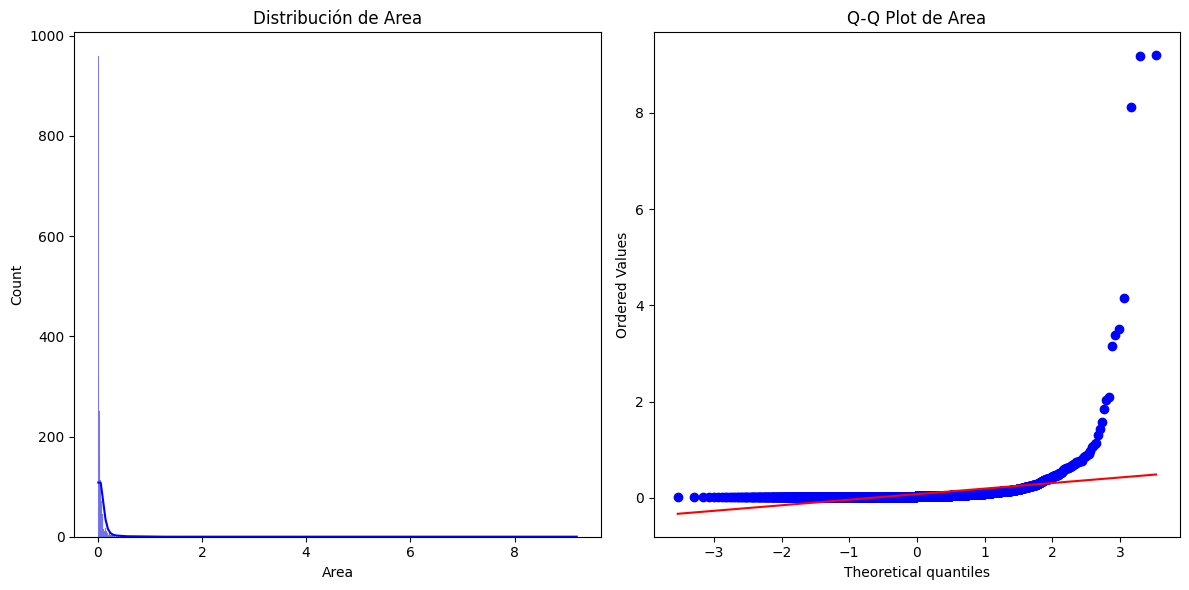

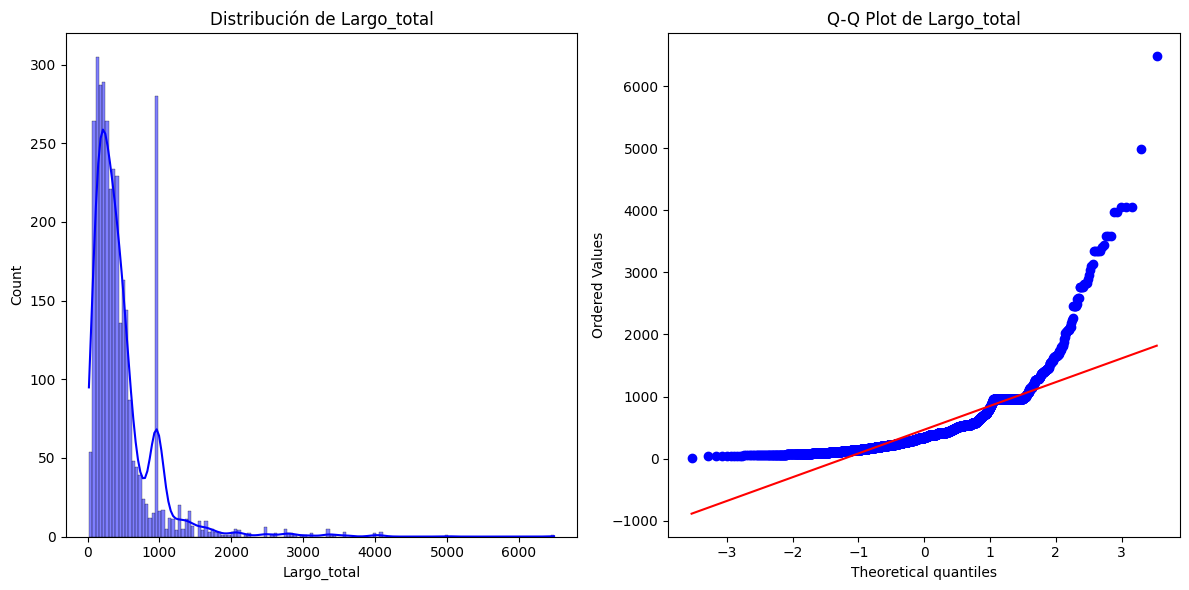

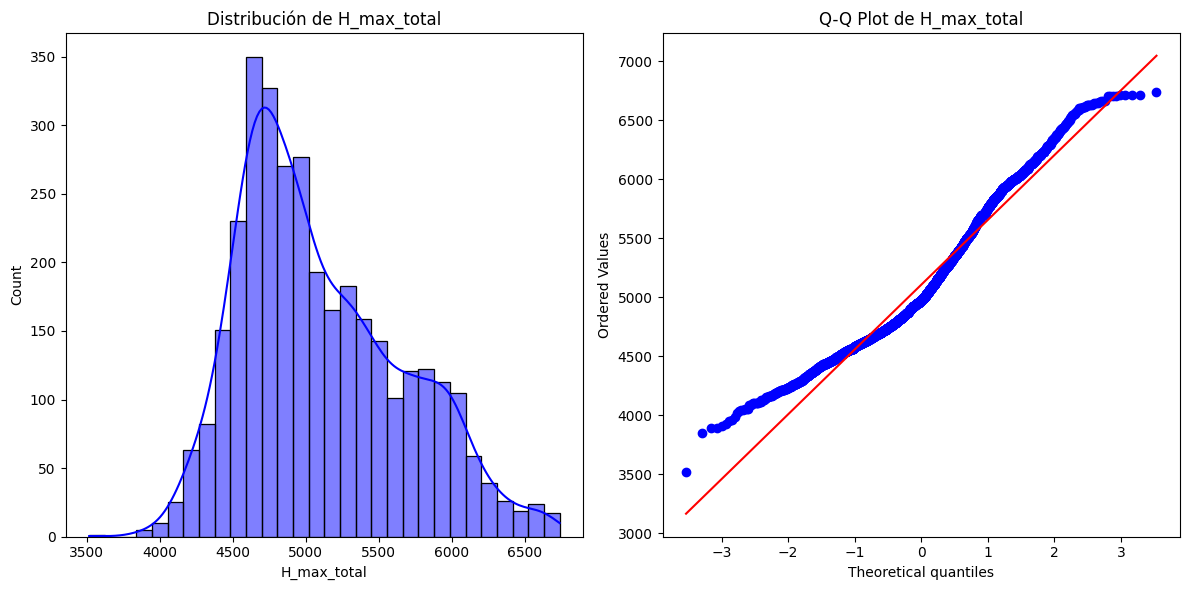

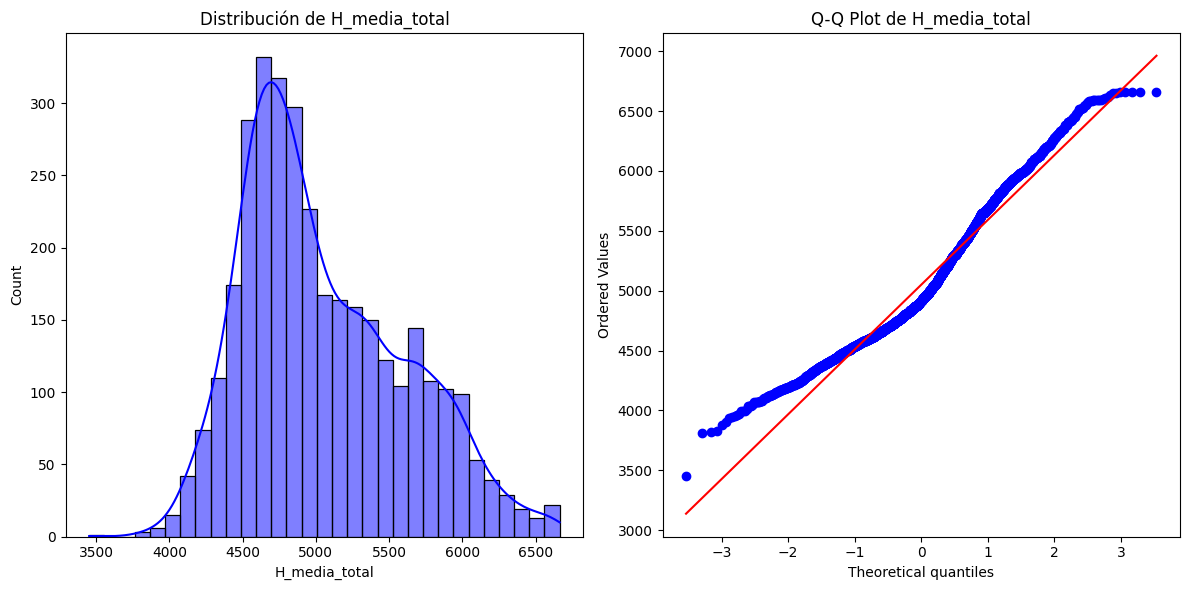

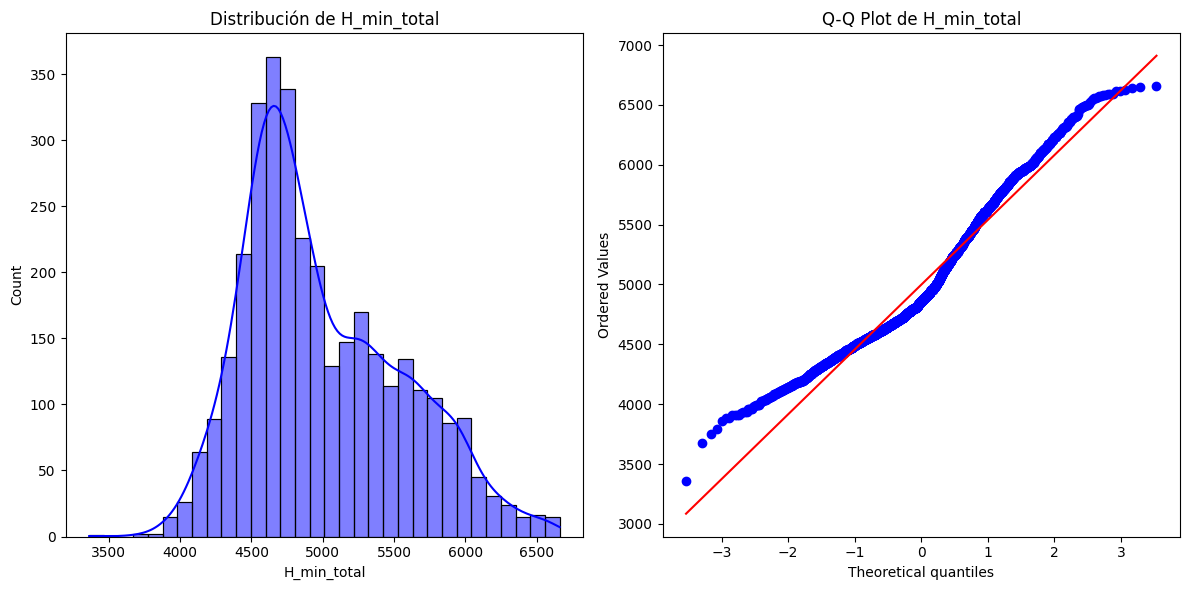

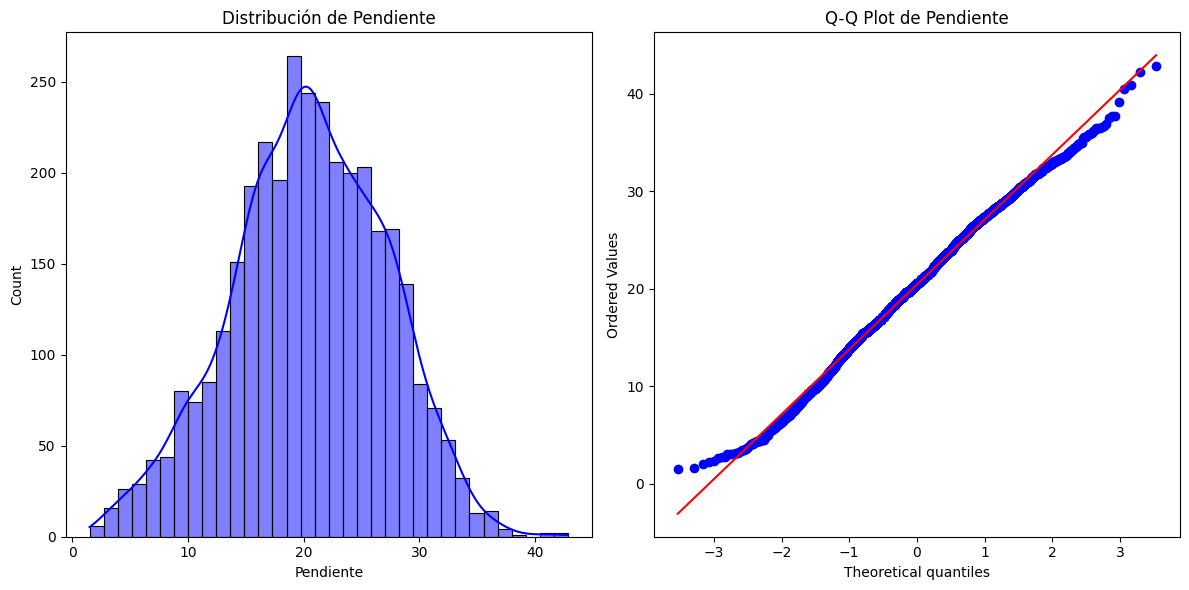

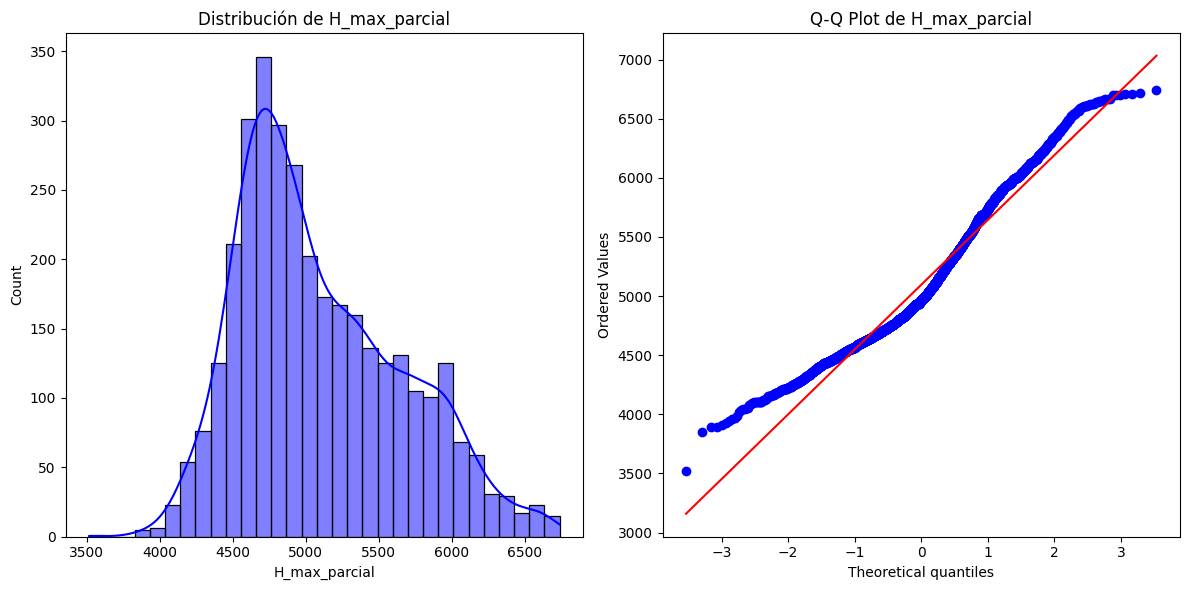

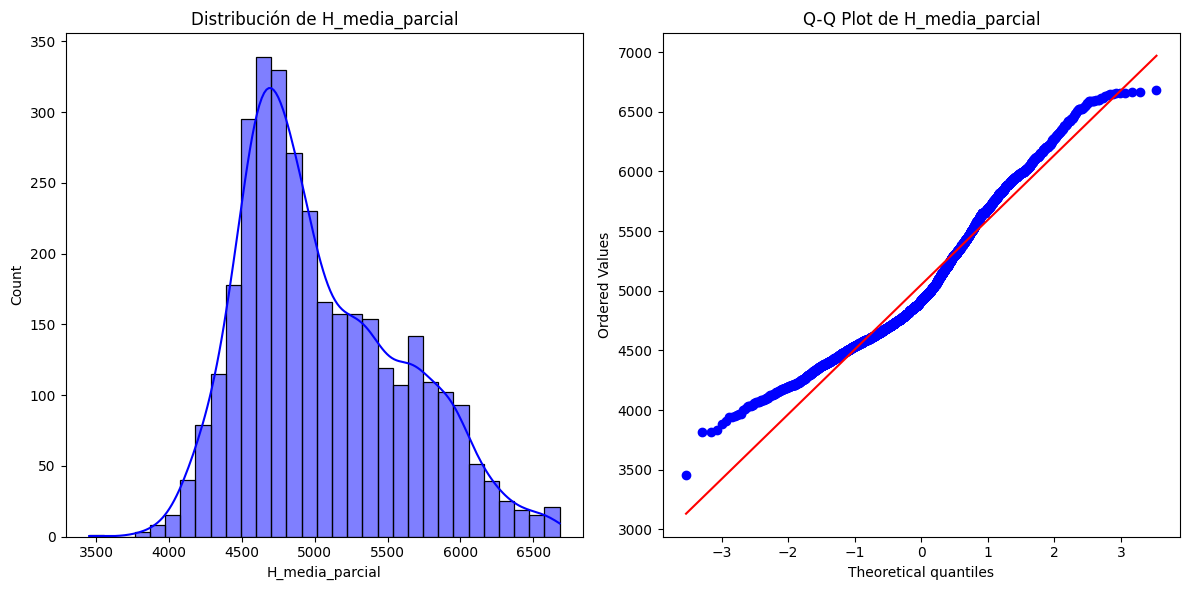

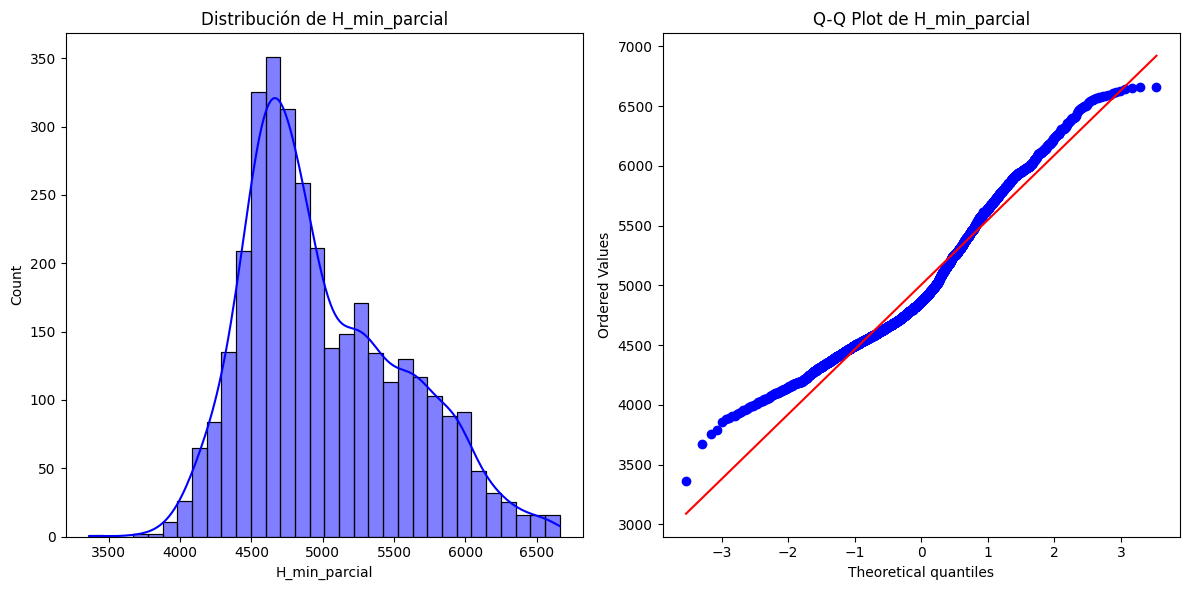

In [18]:
numeric_features = ['Area', 'Largo_total', 'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial']

# Graficamos la distribución y Q-Q plot
def plot_distribution(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f"Distribución de {feature}")

    plt.subplot(1, 2, 2)
    stats.probplot(data[feature].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {feature}")

    plt.tight_layout()
    plt.show()

# Graficamos todas las columnas numéricas
for feature in numeric_features:
    plot_distribution(df3, feature)

Para todos los features, aunque hay ciertas diferencias en comportamiento, se sigue observando la normalidad/falta de normalidad de cada caso, descrita anteriormente.


## Detección de outliers

Para detección de outliers se utilizará el método de IQR (Interquartile Range). Posteriormente, para su eliminación se aplicará el método del puntaje Z (z-score). Aplicamos ambos métodos con fines prácticos y para entender su funcionamiento, aunque reconocemos que el método del z-score es generalmente mejor, especialmente cuando los datos siguen una distribución aproximadamente normal (como es el caso para gran parte de los features de este dataset).

Primero, analizamos los outliers en df2 y observamos los resultados.

In [19]:

outliers_info = {}

# Loop por cada columna numérica con df2
for col in df2.select_dtypes(include='number').columns:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificamos índices de filas con outliers
    outlier_rows = df2[(df2[col] < limite_inferior) | (df2[col] > limite_superior)].index.tolist()

    # Si hay outliers, se guarda la información (que fila lo tiene) -> con esto podemos hacer una verificación manual de los mismos
    if outlier_rows:
        outliers_info[col] = outlier_rows

# Mostramos resultados
for col, filas in outliers_info.items():
    print(f"🔸 La columna '{col}' tiene {len(filas)} outliers en las filas: {filas}")

🔸 La columna 'Clas_prima' tiene 5 outliers en las filas: [1210, 1741, 2939, 2940, 3151]
🔸 La columna 'Origen_GE' tiene 97 outliers en las filas: [103, 148, 717, 719, 853, 963, 964, 966, 1004, 1009, 1073, 1074, 1091, 1143, 1238, 1245, 1249, 1294, 1309, 1328, 1388, 1450, 1504, 1535, 1551, 1561, 1562, 1582, 1608, 1619, 1620, 1621, 1988, 1993, 2052, 2168, 2198, 2239, 2243, 2244, 2263, 2266, 2292, 2293, 2304, 2308, 2309, 2333, 2343, 2390, 2402, 2416, 2422, 2426, 2430, 2518, 2522, 2524, 2525, 2526, 2528, 2538, 2548, 2557, 2562, 2563, 2564, 2569, 2577, 2596, 2618, 2620, 2663, 2664, 2665, 2666, 2686, 2695, 2715, 2724, 2727, 2736, 2737, 2745, 2900, 2901, 2942, 3045, 3064, 3065, 3066, 3067, 3330, 3331, 3332, 3361, 3362]
🔸 La columna 'Forma_GE' tiene 1 outliers en las filas: [3332]
🔸 La columna 'Estruct_I' tiene 5 outliers en las filas: [209, 1501, 1523, 1545, 1607]
🔸 La columna 'Estruct_II' tiene 404 outliers en las filas: [93, 105, 106, 108, 109, 110, 116, 128, 134, 135, 137, 138, 139, 145, 146

Luego, analizamos los outliers de df3 (tabla sin valores NaN) para ver si hay cambios en el N° de outliers. Como se puede observar, los outliers disminuyeron en todas las features. Siendo la de mayor cantidad `Largo_total` con 196 outliers.

In [20]:

outliers_info = {}

# Loop por cada columna numérica
for col in df3.select_dtypes(include='number').columns:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificamos índices de filas con outliers
    outlier_rows = df3[(df3[col] < limite_inferior) | (df3[col] > limite_superior)].index.tolist()

    # Si hay outliers, guardamos la información
    if outlier_rows:
        outliers_info[col] = outlier_rows

# Mostramos resultados
for col, filas in outliers_info.items():
    print(f"🔸 La columna '{col}' tiene {len(filas)} outliers en las filas: {filas}")

🔸 La columna 'Clas_prima' tiene 5 outliers en las filas: [1210, 1741, 2939, 2940, 3151]
🔸 La columna 'Forma_GE' tiene 1 outliers en las filas: [3332]
🔸 La columna 'Area' tiene 357 outliers en las filas: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 66, 96, 98, 103, 106, 121, 122, 127, 151, 153, 155, 193, 194, 196, 290, 313, 325, 328, 333, 341, 344, 361, 365, 367, 374, 404, 411, 413, 416, 421, 424, 429, 432, 465, 477, 501, 512, 517, 523, 525, 530, 537, 560, 578, 579, 580, 590, 594, 595, 598, 600, 602, 687, 689, 691, 693, 697, 698, 710, 716, 741, 759, 761, 779, 780, 781, 841, 844, 853, 881, 884, 897, 906, 910, 940, 963, 980, 984, 1002, 1005, 1022, 1052, 1057, 1059, 1069, 1073, 1081, 1082, 1089, 1092, 1094, 1095, 1099, 1100, 1111, 1116, 1118, 1126, 1131, 1134, 1136, 1137, 1148, 1170, 1171, 1186, 1192, 1194, 1200, 1229, 1365, 1424, 1459, 1540, 1592, 1608, 1615, 1619, 1661, 1675, 1678, 1679, 1683, 1687, 1694, 1695, 1700, 1705, 1708, 170

Creamos una tabla que nos diga cuantos outliers hay en cada feature, analizando df2 (con valores nulos) y df3 (sin nulos, tratado unas líneas más arriba).

In [21]:
# Loop por cada columna numérica
for col in df2.select_dtypes(include='number').columns:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificamos los índices de filas con outliers
    outlier_rows = df2[(df2[col] < limite_inferior) | (df2[col] > limite_superior)].index.tolist()

    # Guardamos la cantidad de outliers que hay por feature
    outliers_info[col] = len(outlier_rows)

# Tabla con los resultados
tabla_outliers_df2 = pd.DataFrame(list(outliers_info.items()), columns=['Feature', 'N° Outliers'])

tabla_outliers_df2

Feature  N° Outliers
0        Clas_prima            5
1          Forma_GE            1
2              Area          365
3       Largo_total          237
4       H_max_total            9
5     H_media_total           10
6       H_min_total           15
7         Pendiente            6
8     H_max_parcial           10
9   H_media_parcial           12
10    H_min_parcial           17
11        Origen_GE           97
12           Act_GE            0
13        Estruct_I            5
14       Estruct_II          404
15         Longitud            0
16          Latitud            0

In [22]:
# Loop por cada columna numérica
for col in df3.select_dtypes(include='number').columns:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificamos los índices de filas con outliers
    outlier_rows = df3[(df3[col] < limite_inferior) | (df3[col] > limite_superior)].index.tolist()

    # Guardamos la cantidad de outliers
    outliers_info[col] = len(outlier_rows)

# Tabla con resultados
tabla_outliers_df3 = pd.DataFrame(list(outliers_info.items()), columns=['Feature', 'N° Outliers'])

tabla_outliers_df3

Feature  N° Outliers
0        Clas_prima            5
1          Forma_GE            1
2              Area          357
3       Largo_total          196
4       H_max_total            7
5     H_media_total            9
6       H_min_total           12
7         Pendiente            8
8     H_max_parcial            7
9   H_media_parcial           10
10    H_min_parcial           12
11        Origen_GE            0
12           Act_GE            0
13        Estruct_I            0
14       Estruct_II            0
15         Longitud            0
16          Latitud            0

**Creamos un gráfico que muestre el N° de outliers para cada dataframe, analizando df2 (con valores nulos) y df3 (sin nulos)**

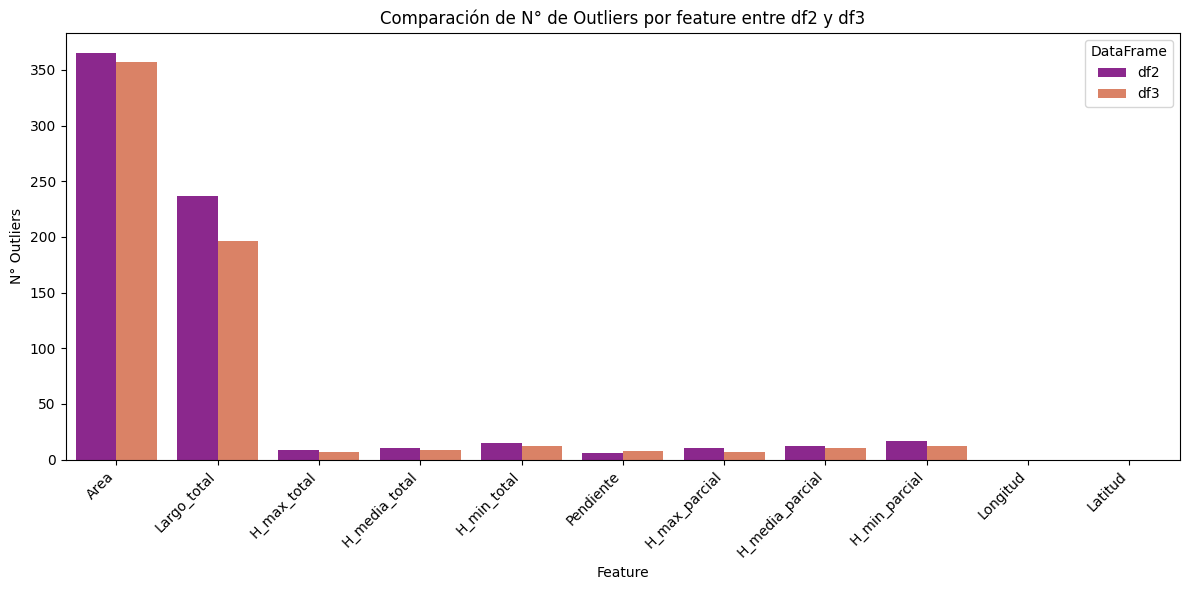

In [23]:
# Unimos ambas tablas
outliers_comparados = pd.concat([tabla_outliers_df2, tabla_outliers_df3])

# Agregamos una columna para identificar de donde provienen los datos
outliers_comparados['DataFrame'] = ['df2'] * len(tabla_outliers_df2) + ['df3'] * len(tabla_outliers_df3)

outliers_filtrados = outliers_comparados[~outliers_comparados['Feature'].isin(["Clas_prima","Forma_GE","Origen_GE","Act_GE","Estruct_I","Estruct_II"])] # Evitamos evaluar outliers de features categóricos

# Gráfico de barras
plt.figure(figsize=(12, 6))

sns.barplot(data=outliers_filtrados, x='Feature', y='N° Outliers', hue='DataFrame', palette='plasma')
plt.title('Comparación de N° de Outliers por feature entre df2 y df3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Para analizar los outliers de cada variable, primero nos fijamos si la variable es numérica o categórica, ya que hay variables que tienen valores numéricos pero corresponder a una variable categórica. Por ejemplo, `Clas_prima`.

Luego, para cada variable numérica realizamos un gráfico de cajas con bigotes para así identificar los outliers, es decir, los valores que se encuentran sobre o por debajo de los bigotes.

<ipython-input-24-710987d5066b>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Largo total')


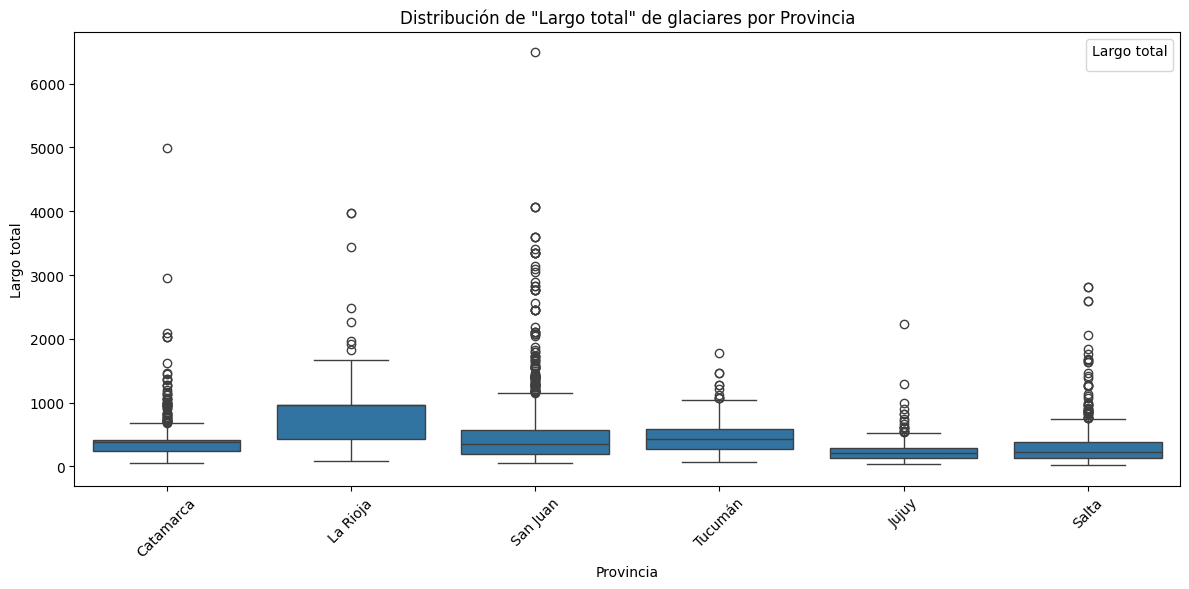

In [24]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='Largo_total')

plt.title('Distribución de "Largo total" de glaciares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Largo total')
plt.xticks(rotation=45)
plt.legend(title='Largo total')
plt.tight_layout()

<ipython-input-25-96562a5c82fc>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title= 'altura máxima total')


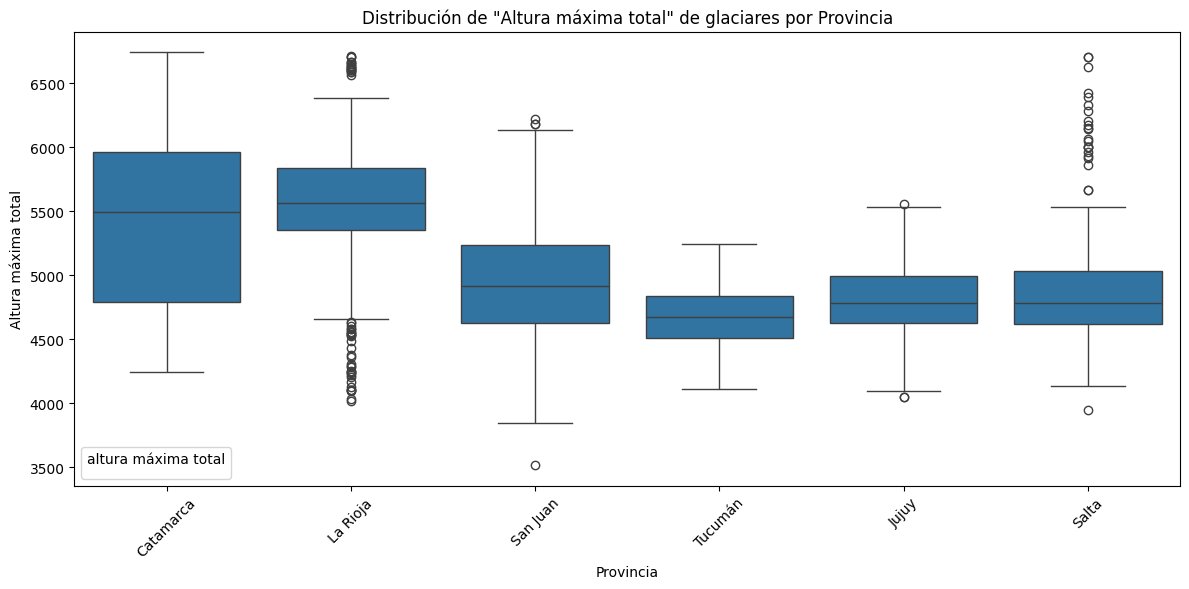

In [25]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='H_max_total')

plt.title('Distribución de "Altura máxima total" de glaciares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Altura máxima total')
plt.xticks(rotation=45)
plt.legend(title= 'altura máxima total')
plt.tight_layout()

<ipython-input-26-7b5998e285fe>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura media total')


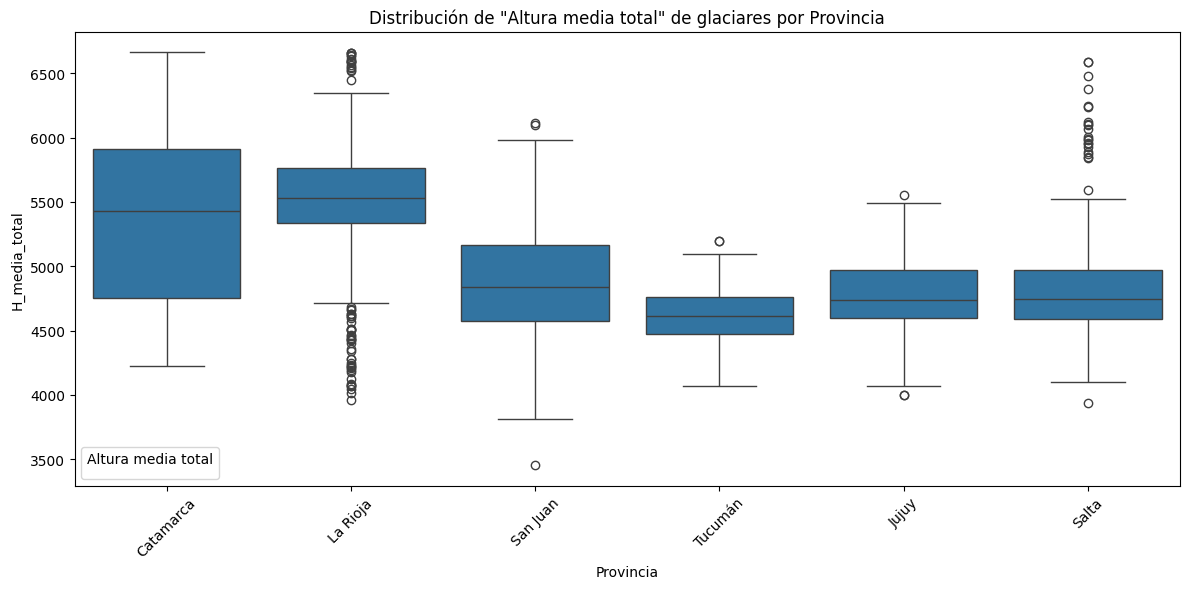

In [26]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='H_media_total')

plt.title('Distribución de "Altura media total" de glaciares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_media_total')
plt.xticks(rotation=45)
plt.legend(title='Altura media total')
plt.tight_layout()

<ipython-input-27-40d1c076eb7d>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='altura mínima total')


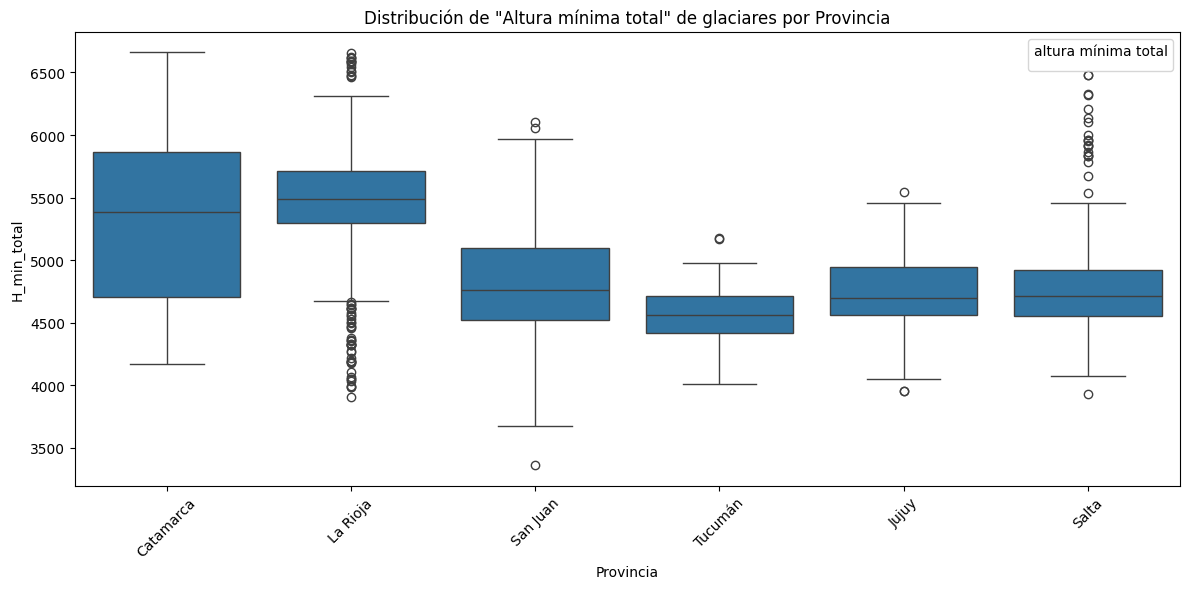

In [27]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='H_min_total')

plt.title('Distribución de "Altura mínima total" de glaciares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_min_total')
plt.xticks(rotation=45)
plt.legend(title='altura mínima total')
plt.tight_layout()

<ipython-input-28-c007f6df8bc2>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Pendiente')


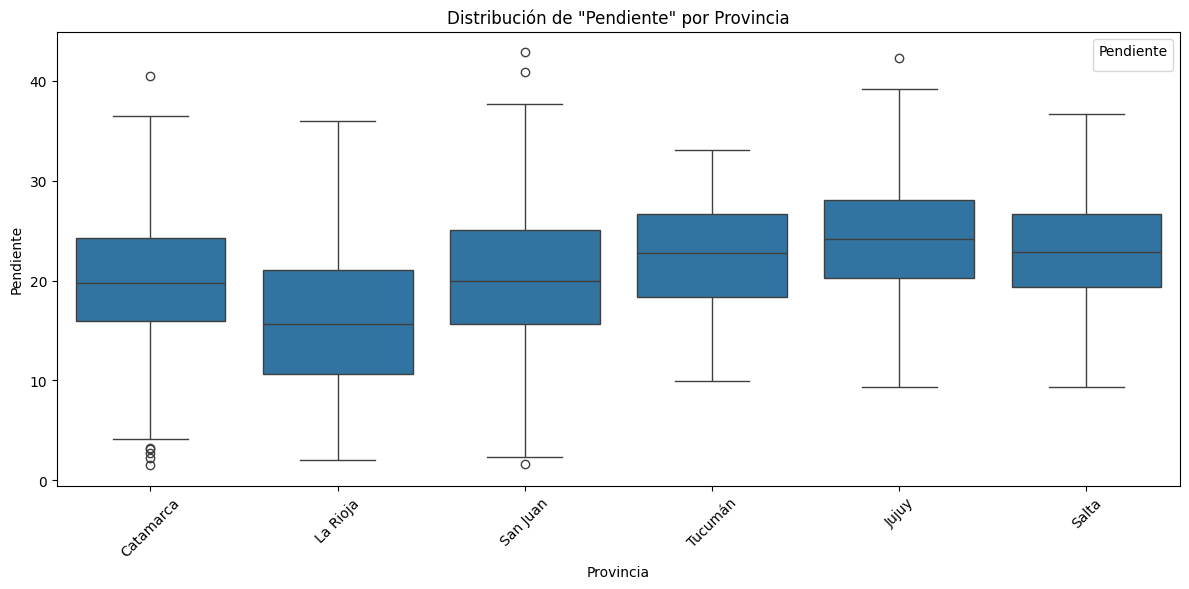

In [28]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='Pendiente')

plt.title('Distribución de "Pendiente" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Pendiente')
plt.xticks(rotation=45)
plt.legend(title='Pendiente')
plt.tight_layout()

<ipython-input-29-31dbb8f30f57>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura máxima parcial')


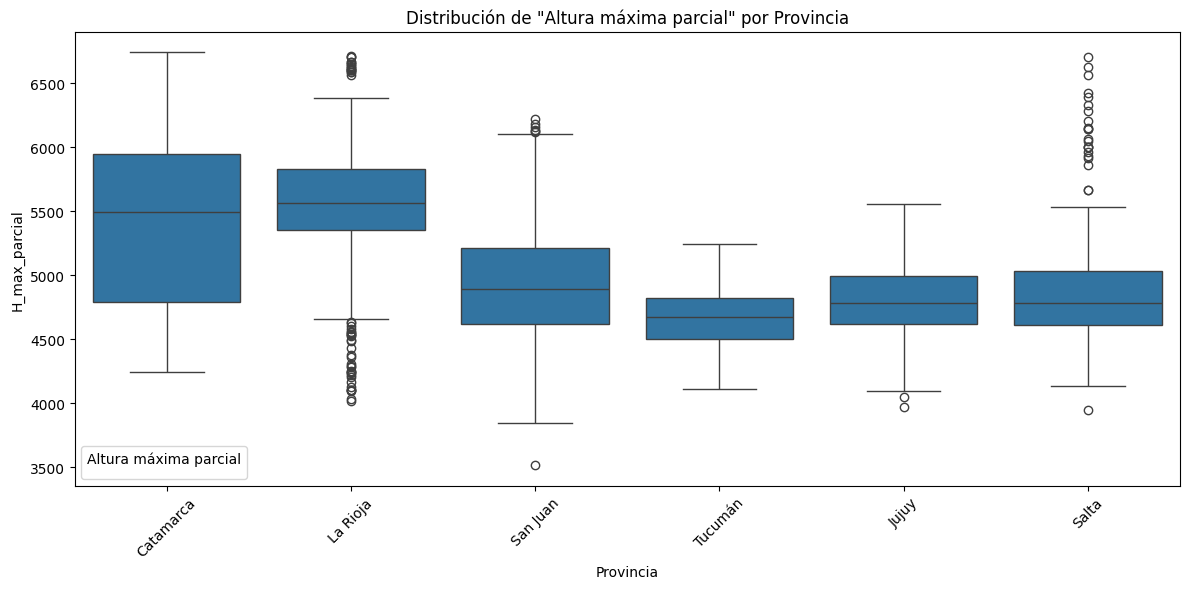

In [29]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='H_max_parcial')

plt.title('Distribución de "Altura máxima parcial" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_max_parcial')
plt.xticks(rotation=45)
plt.legend(title='Altura máxima parcial')
plt.tight_layout()

<ipython-input-30-8af50668fbe6>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura madia parcial')


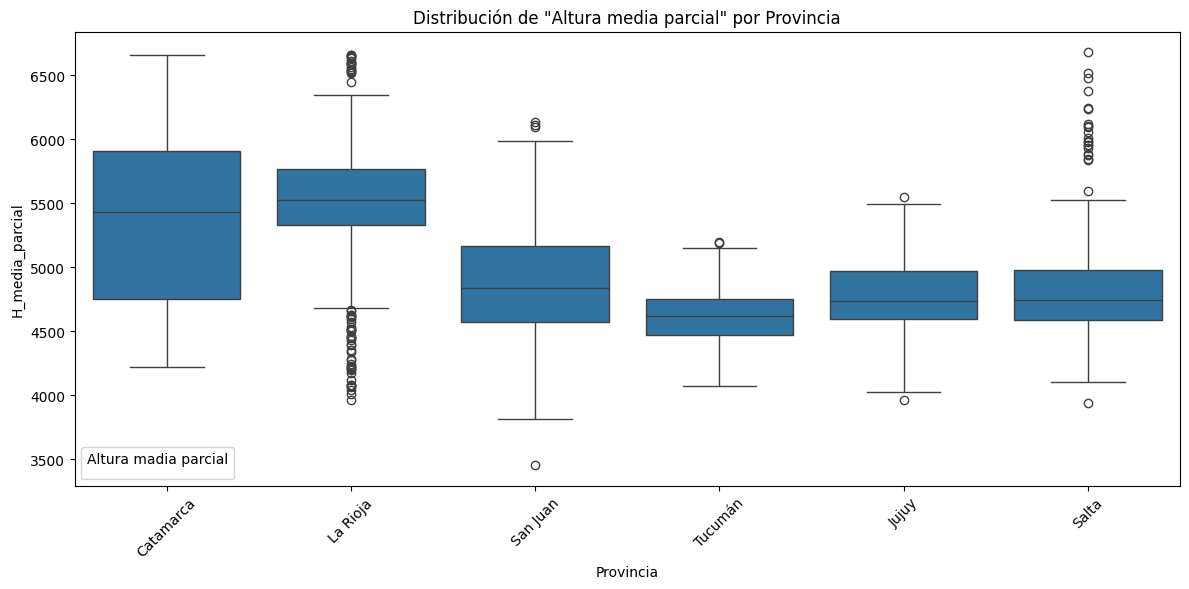

In [30]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='H_media_parcial')

plt.title('Distribución de "Altura media parcial" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_media_parcial')
plt.xticks(rotation=45)
plt.legend(title='Altura madia parcial')
plt.tight_layout()

<ipython-input-31-bd3760429e78>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura mínima parcial')


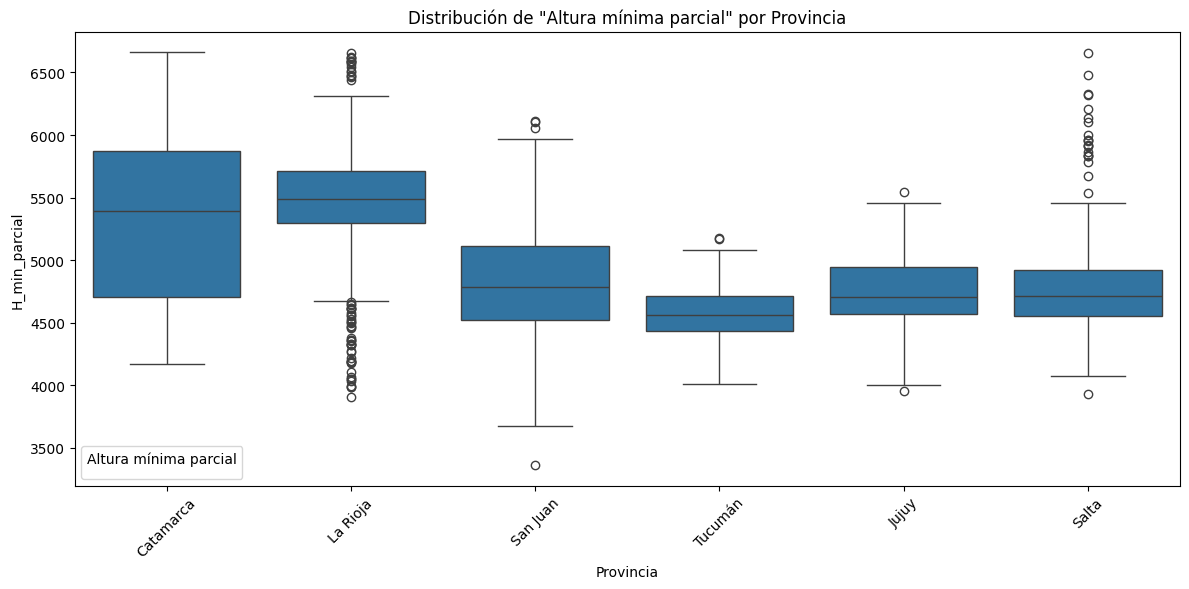

In [31]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Provincia', y='H_min_parcial')

plt.title('Distribución de "Altura mínima parcial" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_min_parcial')
plt.xticks(rotation=45)
plt.legend(title='Altura mínima parcial')
plt.tight_layout()

**Interpretación de resultados BoxPlot**

 Todas las variables presentan outliers en alguna provincia. Siendo en algunas más evidente que en otras. Por ejemplo, la provincia de La Rioja presenta gran cantidad de outliers en todas las features, menos en `pendiente`. En general la variable `pendiente` es la que presenta la menor cantidad de ouliers y una distribución normal de acuerdo a los gráficos.


## Eliminación de outliers con z-score

**Z-score umbral de 3**

Para la implementación de la herramienta z-score utilizamos el valor 3 como umbral en el z-score porque en una distribución normal el 99.7% de los datos se encuentra dentro de 3 desviaciones estándar de la media, por lo que cualquier valor fuera de ese rango es considerado raro o atípico.

In [32]:
#Calculamos de z-score para los features
features = ['Area', 'Largo_total', 'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial']
z_scores = df3[features].apply(zscore)

# Seumbral
threshold = 3

#filtro para identificar los outliers
outliers = (z_scores.abs() > threshold)

# Eliminamos filas con al menos un outlier
df3_filtrado = df3[~outliers.any(axis=1)]

print(f"Filas originales: {df3.shape[0]}")
print(f"Filas después de eliminar outliers: {df3_filtrado.shape[0]}")

df3_filtrado

Filas originales: 3380
Filas después de eliminar outliers: 3310


Provincia               Cuenca                   Subcuenca  \
0     Catamarca    Varias de la Puna  Antofagasta de las Sierras   
1     Catamarca    Varias de la Puna  Antofagasta de las Sierras   
2      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
3      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
4      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
...         ...                  ...                         ...   
3375   San Juan            R. Jáchal          R. Blanco Inferior   
3376   San Juan            R. Jáchal          R. Blanco Inferior   
3377   San Juan            R. Jáchal          R. Blanco Inferior   
3378   San Juan            R. Jáchal          R. Blanco Inferior   
3379   San Juan            R. Jáchal          R. Blanco Inferior   

     Codigo_cuenca         ID_local Tipo_geoforma  Clas_prima  Origen_GE  \
0         K0830000  G670333O263768S            ND           7       -1.0   
1         K0830000  G670552O265877S            ND           7       -1.0   
2         F0520000  G687787O277928S            ND           7       -1.0   
3         F0520000  G687996O277880S            ND           7       -1.0   
4         F0520000  G687819O278222S            ND           7       -1.0   
...            ...              ...           ...         ...        ...   
3375      J0530000  G694052O296515S            GC           6       -1.0   
3376      J0530000  G697667O300847S            GC           6       -1.0   
3377      J0530000  G694568O296062S            MN           7       -1.0   
3378      J0530000  G696616O300497S            MN           6       -1.0   
3379      J0530000  G696170O300705S            GC           6       -1.0   

      Act_GE  Forma_GE  ...  H_media_total  H_min_total  Pendiente  \
0       -1.0      -1.0  ...    5295.400000  5261.880000  22.304160   
1       -1.0      -1.0  ...    5295.400000  5261.880000  22.304160   
2       -1.0      -1.0  ...    5648.555133  5608.068441  15.612494   
3       -1.0      -1.0  ...    5648.555133  5608.068441  15.612494   
4       -1.0      -1.0  ...    5648.555133  5608.068441  15.612494   
...      ...       ...  ...            ...          ...        ...   
3375    -1.0      -1.0  ...    5105.000000  4953.000000  19.748000   
3376    -1.0      -1.0  ...    4836.000000  4686.000000  23.951000   
3377    -1.0      -1.0  ...    5915.000000  5901.000000   9.868000   
3378    -1.0      -1.0  ...    4868.000000  4640.000000  19.097000   
3379    -1.0      -1.0  ...    4922.000000  4688.000000  21.692000   

      Orientacion  H_max_parcial  H_media_parcial  H_min_parcial    Img_ba_F  \
0               S    5328.640000      5295.240000    5263.520000  2020-08-13   
1               S    5328.640000      5295.240000    5263.520000  2020-08-13   
2              SE    5688.110266      5648.494297    5611.326996  2021-01-18   
3              SE    5688.110266      5648.494297    5611.326996  2021-01-18   
4              SE    5688.110266      5648.494297    5611.326996  2021-01-18   
...           ...            ...              ...            ...         ...   
3375           SE    5089.000000      5000.000000    4953.000000  2020-03-19   
3376            S    4836.000000      4748.000000    4686.000000  2020-03-19   
3377            S    5931.000000      5915.000000    5901.000000  2020-03-19   
3378            S    5113.000000      5113.000000    5112.000000  2020-03-19   
3379            E    4839.000000      4755.000000    4688.000000  2020-03-19   

        Img_ba_S           Img_ap_S  
0     SENTINEL-2        Desconocido  
1     SENTINEL-2        Desconocido  
2     SENTINEL-2        Desconocido  
3     SENTINEL-2        Desconocido  
4     SENTINEL-2        Desconocido  
...          ...                ...  
3375  SENTINEL-2  Bing/Google Earth  
3376  SENTINEL-2  Bing/Google Earth  
3377  SENTINEL-2        Desconocido  
3378  SENTINEL-2        Desconocido  
3379  SENTINEL-2  Bing/Google Earth  

[3310 rows x 27 c

**Gráfico Boxplot**

Luego de la aplicación del z-score con un umbral de 3, hacemos un boxplot para ver como quedaron los outliers. Lo realizamos a modo de muestra con "Altura mínima parcial" pero podríamos haberlo hecho con cualquier feature que presente outliers.

<ipython-input-33-97e48d92a2c0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura mínima parcial')


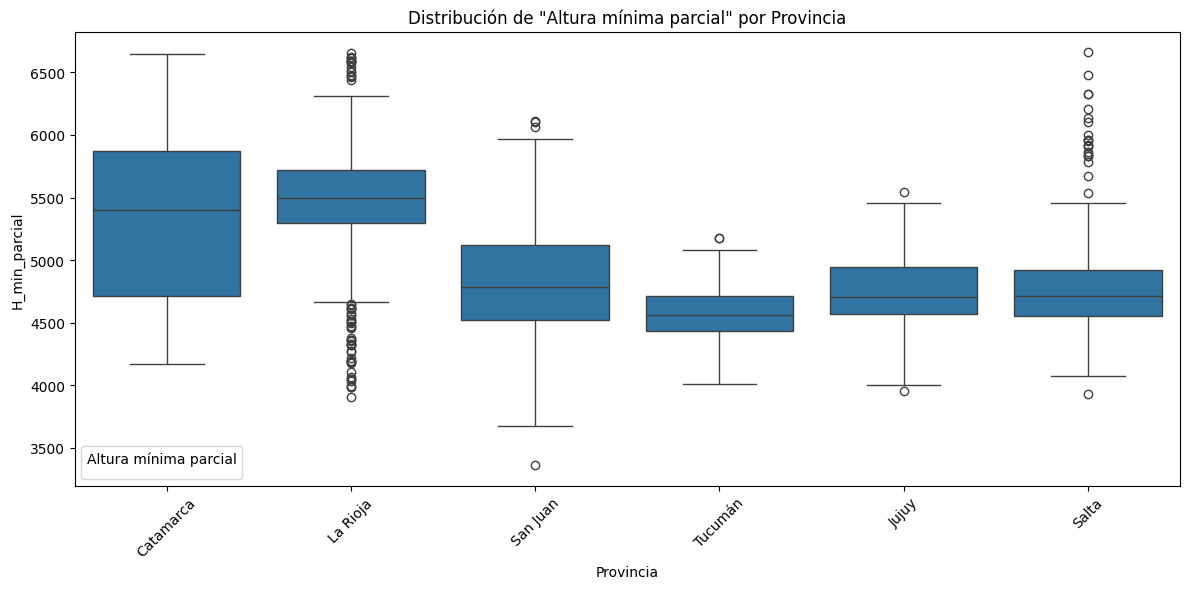

In [33]:
# Gráfico de caja (boxplot) para saber como se acomodaron los datos al umbral de 3 (99.7%)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3_filtrado, x='Provincia', y='H_min_parcial')

plt.title('Distribución de "Altura mínima parcial" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_min_parcial')
plt.xticks(rotation=45)
plt.legend(title='Altura mínima parcial')
plt.tight_layout()

**Interpretación de boxplot con umbral de 3**

Como podemos observar en el gráfico, todavía hay una cantidad considerable de outliers en este feature. Por lo que decidimos ser más rigurosas y aplicar el z-score con el umbral de 2 y ver los resultados.

**Z-score umbral de 2**

En este segundo, utilizamos el valor 2 como umbral en el z-score porque en una distribución normal el 95% de los datos se encuentra dentro de 2 desviaciones estándar de la media, por lo que cualquier valor fuera de ese rango es considerado raro o atípico. De 3380 filas originales quedaron 2968 después de aplicar el z-score.

In [34]:
#Calculamos de z-score para los features
features = ['Area', 'Largo_total', 'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial']
z_scores = df3[features].apply(zscore)

# Seumbral
threshold = 2

#filtro para identificar los outliers
outliers = (z_scores.abs() > threshold)

# Eliminamos filas con al menos un outlier
df3_filtrado2 = df3[~outliers.any(axis=1)]

print(f"Filas originales: {df3.shape[0]}")
print(f"Filas después de eliminar outliers: {df3_filtrado2.shape[0]}")

df3_filtrado2

Filas originales: 3380
Filas después de eliminar outliers: 2968


Provincia               Cuenca                   Subcuenca  \
0     Catamarca    Varias de la Puna  Antofagasta de las Sierras   
1     Catamarca    Varias de la Puna  Antofagasta de las Sierras   
2      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
3      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
4      La Rioja  R. Vinchina-Bermejo         R. Vinchina-Bermejo   
...         ...                  ...                         ...   
3373   San Juan            R. Jáchal          R. Blanco Inferior   
3375   San Juan            R. Jáchal          R. Blanco Inferior   
3376   San Juan            R. Jáchal          R. Blanco Inferior   
3377   San Juan            R. Jáchal          R. Blanco Inferior   
3378   San Juan            R. Jáchal          R. Blanco Inferior   

     Codigo_cuenca         ID_local Tipo_geoforma  Clas_prima  Origen_GE  \
0         K0830000  G670333O263768S            ND           7       -1.0   
1         K0830000  G670552O265877S            ND           7       -1.0   
2         F0520000  G687787O277928S            ND           7       -1.0   
3         F0520000  G687996O277880S            ND           7       -1.0   
4         F0520000  G687819O278222S            ND           7       -1.0   
...            ...              ...           ...         ...        ...   
3373      J0530000  G693988O296981S            MN           7       -1.0   
3375      J0530000  G694052O296515S            GC           6       -1.0   
3376      J0530000  G697667O300847S            GC           6       -1.0   
3377      J0530000  G694568O296062S            MN           7       -1.0   
3378      J0530000  G696616O300497S            MN           6       -1.0   

      Act_GE  Forma_GE  ...  H_media_total  H_min_total  Pendiente  \
0       -1.0      -1.0  ...    5295.400000  5261.880000  22.304160   
1       -1.0      -1.0  ...    5295.400000  5261.880000  22.304160   
2       -1.0      -1.0  ...    5648.555133  5608.068441  15.612494   
3       -1.0      -1.0  ...    5648.555133  5608.068441  15.612494   
4       -1.0      -1.0  ...    5648.555133  5608.068441  15.612494   
...      ...       ...  ...            ...          ...        ...   
3373    -1.0      -1.0  ...    5044.000000  5024.000000  27.192000   
3375    -1.0      -1.0  ...    5105.000000  4953.000000  19.748000   
3376    -1.0      -1.0  ...    4836.000000  4686.000000  23.951000   
3377    -1.0      -1.0  ...    5915.000000  5901.000000   9.868000   
3378    -1.0      -1.0  ...    4868.000000  4640.000000  19.097000   

      Orientacion  H_max_parcial  H_media_parcial  H_min_parcial    Img_ba_F  \
0               S    5328.640000      5295.240000    5263.520000  2020-08-13   
1               S    5328.640000      5295.240000    5263.520000  2020-08-13   
2              SE    5688.110266      5648.494297    5611.326996  2021-01-18   
3              SE    5688.110266      5648.494297    5611.326996  2021-01-18   
4              SE    5688.110266      5648.494297    5611.326996  2021-01-18   
...           ...            ...              ...            ...         ...   
3373           SE    5062.000000      5044.000000    5024.000000  2020-03-19   
3375           SE    5089.000000      5000.000000    4953.000000  2020-03-19   
3376            S    4836.000000      4748.000000    4686.000000  2020-03-19   
3377            S    5931.000000      5915.000000    5901.000000  2020-03-19   
3378            S    5113.000000      5113.000000    5112.000000  2020-03-19   

        Img_ba_S           Img_ap_S  
0     SENTINEL-2        Desconocido  
1     SENTINEL-2        Desconocido  
2     SENTINEL-2        Desconocido  
3     SENTINEL-2        Desconocido  
4     SENTINEL-2        Desconocido  
...          ...                ...  
3373  SENTINEL-2        Desconocido  
3375  SENTINEL-2  Bing/Google Earth  
3376  SENTINEL-2  Bing/Google Earth  
3377  SENTINEL-2        Desconocido  
3378  SENTINEL-2        Desconocido  

[2968 rows x 27 c

**Gráfico Boxplot**

<ipython-input-35-4a33f4411b04>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura mínima parcial')


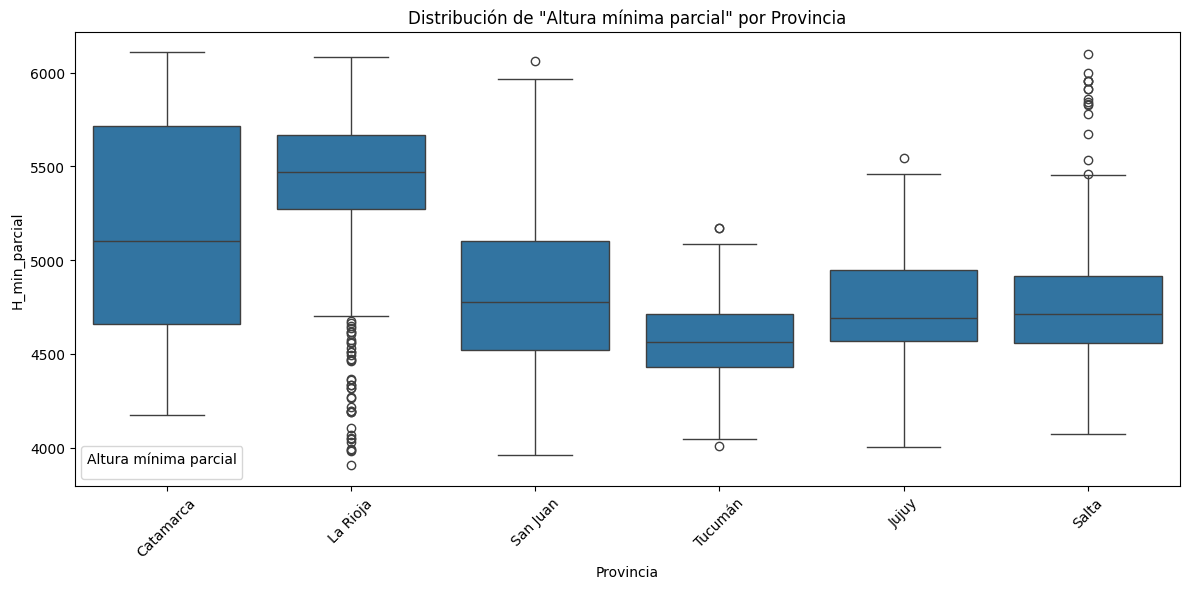

In [35]:
# Gráfico de caja (boxplot) para saber como se acomodaron los datos al umbral de 3 (99.7%)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3_filtrado2, x='Provincia', y='H_min_parcial')

plt.title('Distribución de "Altura mínima parcial" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_min_parcial')
plt.xticks(rotation=45)
plt.legend(title='Altura mínima parcial')
plt.tight_layout()

**Interpretación de boxplot con umbral de 2**

Como podemos observar en el gráfico, los outliers disminuyeron pero todavía encontramos una cantidad significativa en algunas provincias por lo que procedemos a aplicar el umbral de 1.

**Z-score umbral de 1**

En este último, utilizamos el valor 1 como umbral en el z-score porque en una distribución normal el 68% de los datos se encuentra dentro de 1 desviaciones estándar de la media, por lo que cualquier valor fuera de ese rango es considerado raro o atípico. Es el más riguroso de los 3 y lo veremos representado en la cantidad de filas que quedan después de la limpieza.

In [36]:
#Calculamos de z-score para los features
features = ['Area', 'Largo_total', 'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial']
z_scores = df3[features].apply(zscore)

# Seumbral
threshold = 1

#filtro para identificar los outliers
outliers = (z_scores.abs() > threshold)

# Eliminamos filas con al menos un outlier
df3_filtrado1 = df3[~outliers.any(axis=1)]

print(f"Filas originales: {df3.shape[0]}")
print(f"Filas después de eliminar outliers: {df3_filtrado1.shape[0]}")

df3_filtrado1

Filas originales: 3380
Filas después de eliminar outliers: 1309


Provincia             Cuenca                   Subcuenca Codigo_cuenca  \
0     Catamarca  Varias de la Puna  Antofagasta de las Sierras      K0830000   
1     Catamarca  Varias de la Puna  Antofagasta de las Sierras      K0830000   
18     La Rioja  Varias de Velazco           Varias de Velazco      F0890000   
19     La Rioja  Varias de Velazco           Varias de Velazco      F0890000   
20     La Rioja          R. Jáchal          R. Blanco Superior      F0530000   
...         ...                ...                         ...           ...   
3369   San Juan          R. Jáchal          R. Blanco Inferior      J0530000   
3370   San Juan          R. Jáchal          R. Blanco Inferior      J0530000   
3372   San Juan          R. Jáchal          R. Blanco Inferior      J0530000   
3376   San Juan          R. Jáchal          R. Blanco Inferior      J0530000   
3378   San Juan          R. Jáchal          R. Blanco Inferior      J0530000   

             ID_local Tipo_geoforma  Clas_prima  Origen_GE  Act_GE  Forma_GE  \
0     G670333O263768S            ND           7       -1.0    -1.0      -1.0   
1     G670552O265877S            ND           7       -1.0    -1.0      -1.0   
18    G678106O290197S            ND           7       -1.0    -1.0      -1.0   
19    G678117O290172S            ND           7       -1.0    -1.0      -1.0   
20    G688569O277719S            ND           7       -1.0    -1.0      -1.0   
...               ...           ...         ...        ...     ...       ...   
3369  G697931O301898S            GE           9        1.0     2.0       4.0   
3370  G696793O304606S            GE           9        1.0     2.0       2.0   
3372  G697382O303778S            MN           7       -1.0    -1.0      -1.0   
3376  G697667O300847S            GC           6       -1.0    -1.0      -1.0   
3378  G696616O300497S            MN           6       -1.0    -1.0      -1.0   

      ...  H_media_total  H_min_total  Pendiente  Orientacion  H_max_parcial  \
0     ...    5295.400000   5261.88000  22.304160            S    5328.640000   
1     ...    5295.400000   5261.88000  22.304160            S    5328.640000   
18    ...    5235.846154   5194.50000  20.880077           SE    5274.884615   
19    ...    5235.846154   5194.50000  20.880077           SE    5274.884615   
20    ...    5300.857143   5247.61794  16.764764           SE    5349.485050   
...   ...            ...          ...        ...          ...            ...   
3369  ...    4657.000000   4635.00000  24.827000            O    4678.000000   
3370  ...    4570.000000   4548.00000  19.978000           SO    4597.000000   
3372  ...    5200.000000   5136.00000  20.137000           NE    5245.000000   
3376  ...    4836.000000   4686.00000  23.951000            S    4836.000000   
3378  ...    4868.000000   4640.00000  19.097000            S    5113.000000   

      H_media_parcial  H_min_parcial    Img_ba_F    Img_ba_S  \
0         5295.240000    5263.520000  2020-08-13  SENTINEL-2   
1         5295.240000    5263.520000  2020-08-13  SENTINEL-2   
18        5237.519231    5197.673077  2020-10-02  SENTINEL-2   
19        5237.519231    5197.673077  2020-10-02  SENTINEL-2   
20        5303.637874    5258.199336  2021-01-18  SENTINEL-2   
...               ...            ...         ...         ...   
3369      4657.000000    4635.000000  2020-03-19  SENTINEL-2   
3370      4570.000000    4548.000000  2020-03-19  SENTINEL-2   
3372      5200.000000    5136.000000  2020-03-19  SENTINEL-2   
3376      4748.000000    4686.000000  2020-03-19  SENTINEL-2   
3378      5113.000000    5112.000000  2020-03-19  SENTINEL-2   

               Img_ap_S  
0           Desconocido  
1           Desconocido  
18          Desconocido  
19          Desconocido  
20          Desconocido  
...                 ...  
3369  Bing/Google Earth  
3370  Bing/Google Earth  
3372        Desconocido  
3376  Bing/Google Earth  
3378        Desconocido  

[1309 rows x 27 columns]

**Gráfico Boxplot**

<ipython-input-37-fa8b8b75e4af>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Altura mínima parcial')


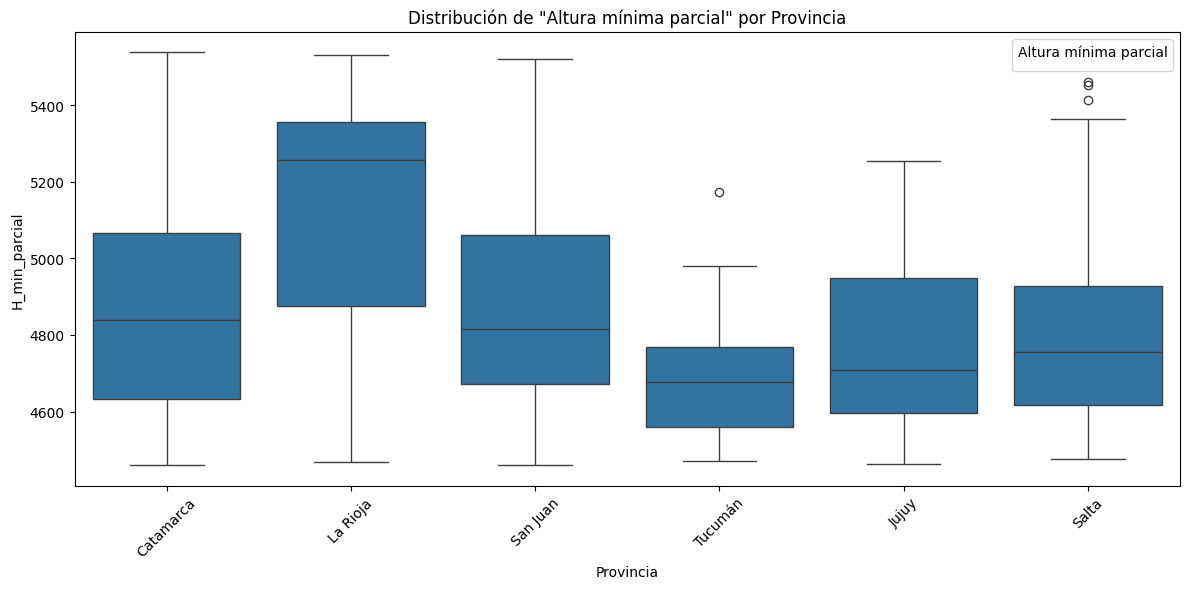

In [37]:
# Gráfico de caja (boxplot) para saber como se acomodaron los datos al umbral de 3 (99.7%)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3_filtrado1, x='Provincia', y='H_min_parcial')

plt.title('Distribución de "Altura mínima parcial" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('H_min_parcial')
plt.xticks(rotation=45)
plt.legend(title='Altura mínima parcial')
plt.tight_layout()

**Interpretación de boxplot con umbral de 1**

Como podemos observar en el gráfico, los features ya casi no presentar valores atípicos pero también observamos una disminución muy grande en la cantidad de filas. De 3380 filas iniciales quedaron 1309.

**Análisis de normalidad complementario Luego de la manipulación de outliers**

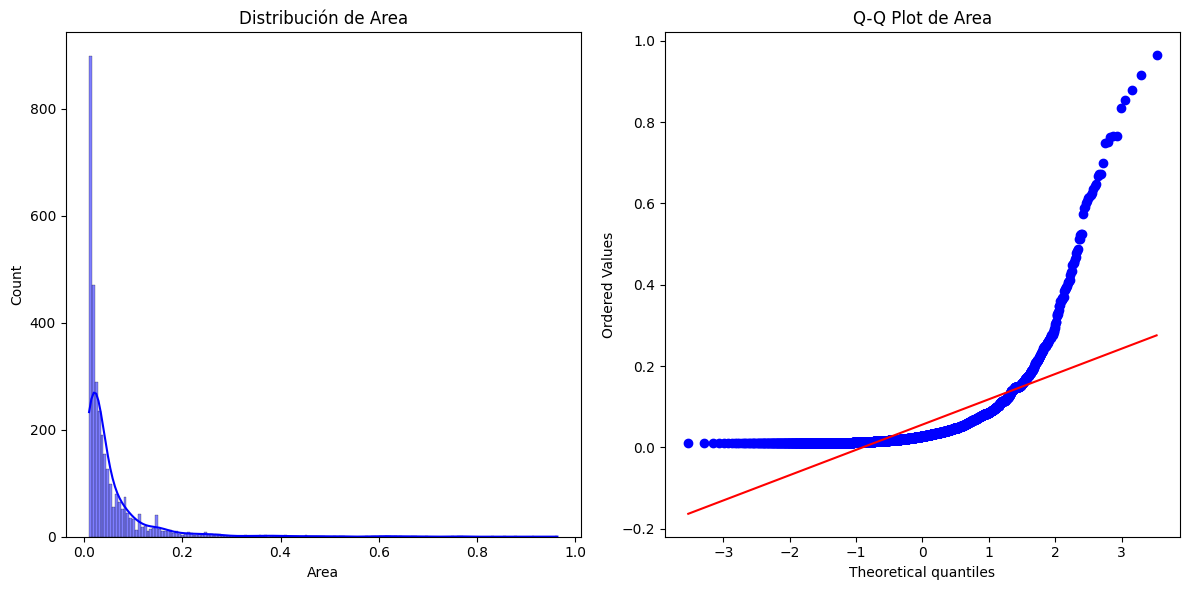

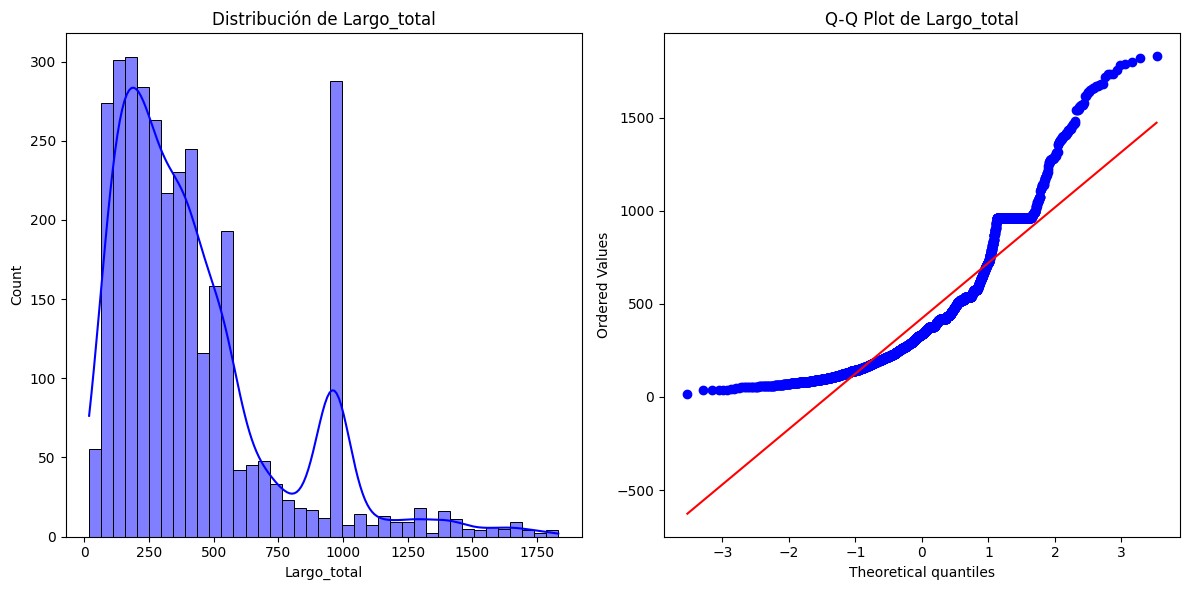

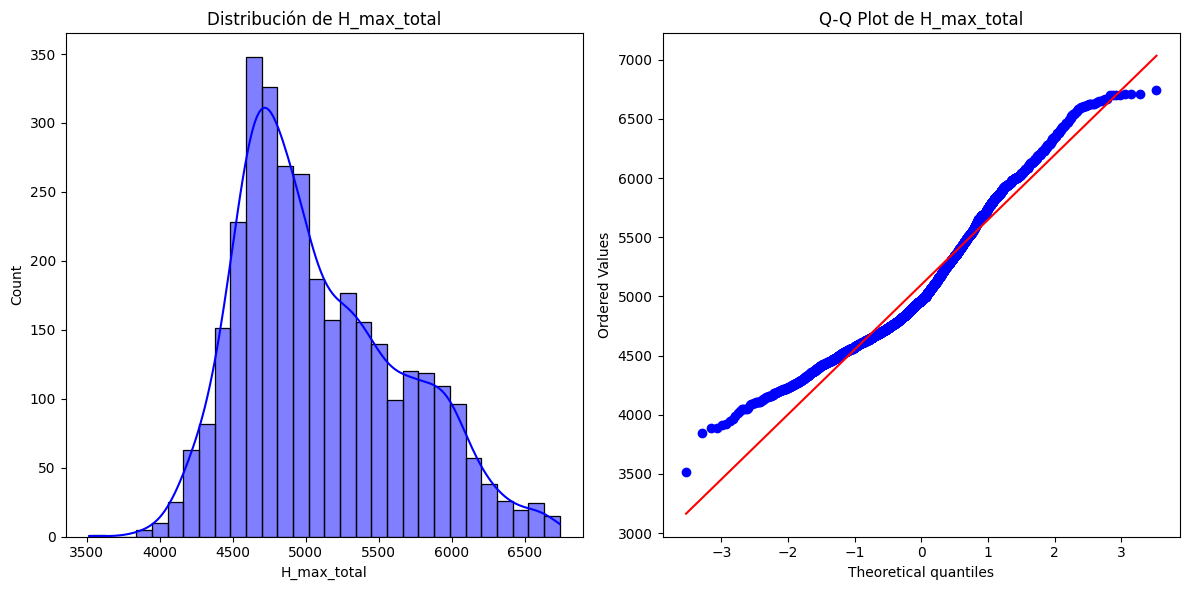

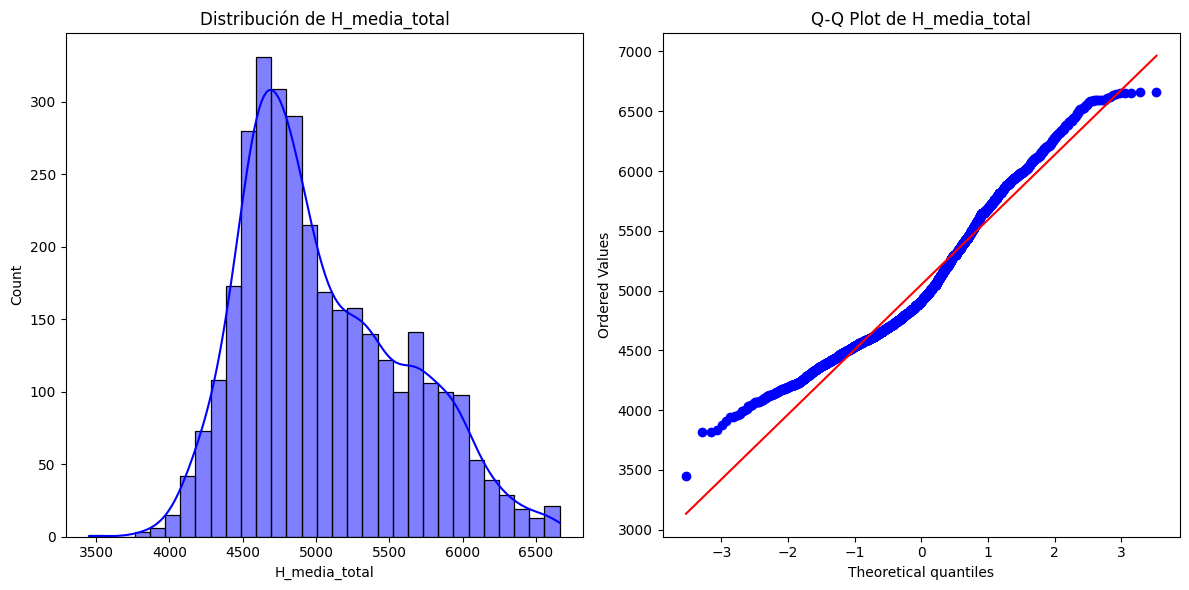

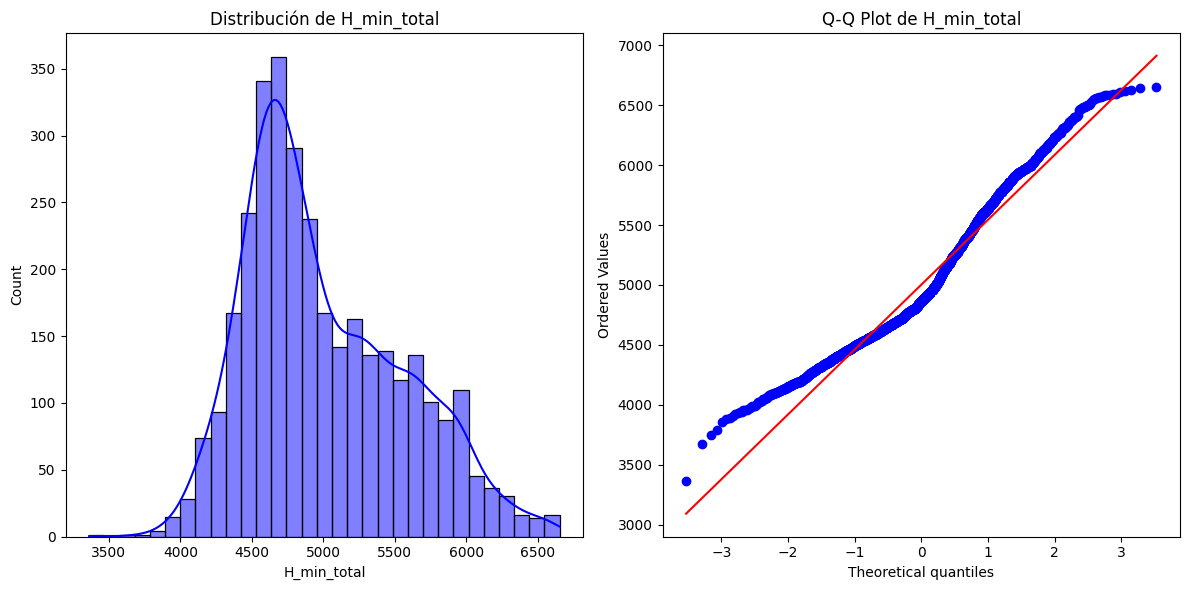

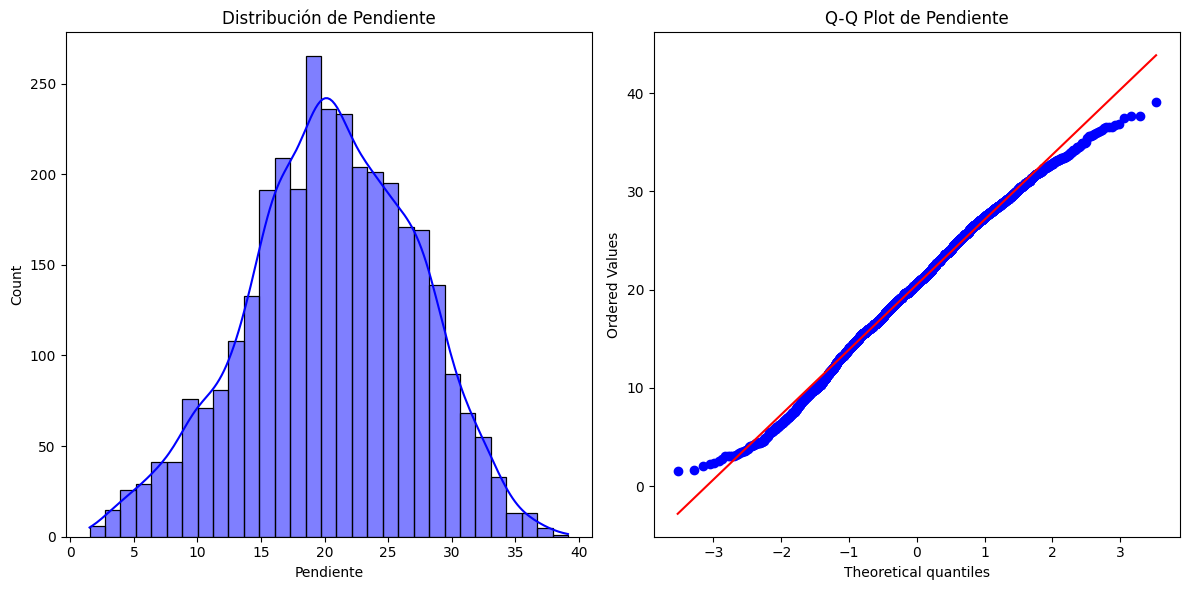

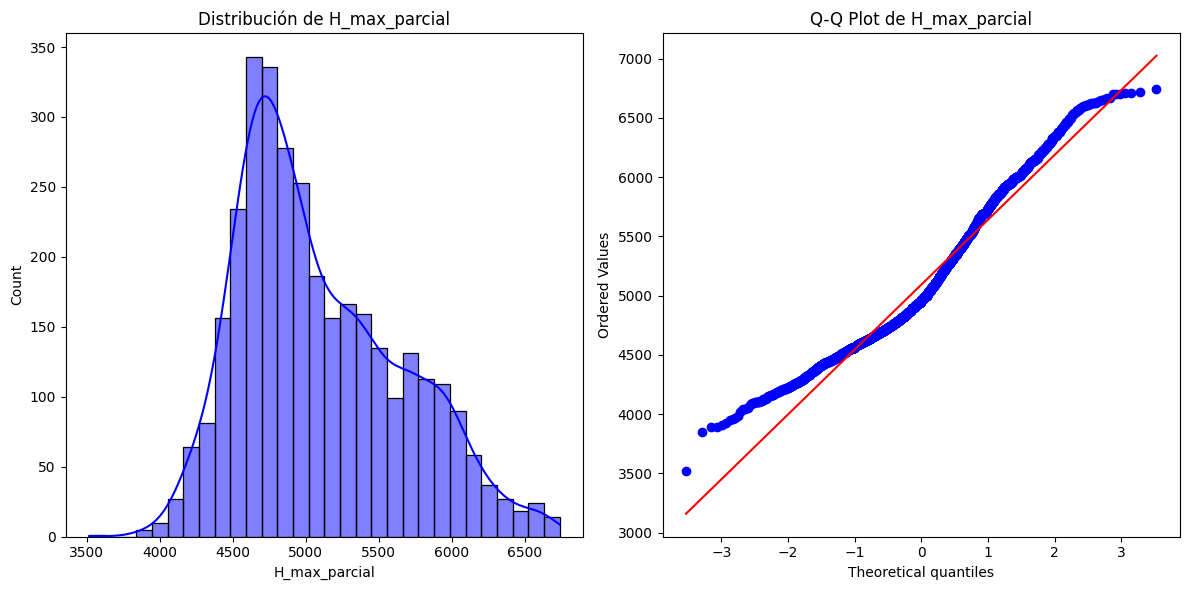

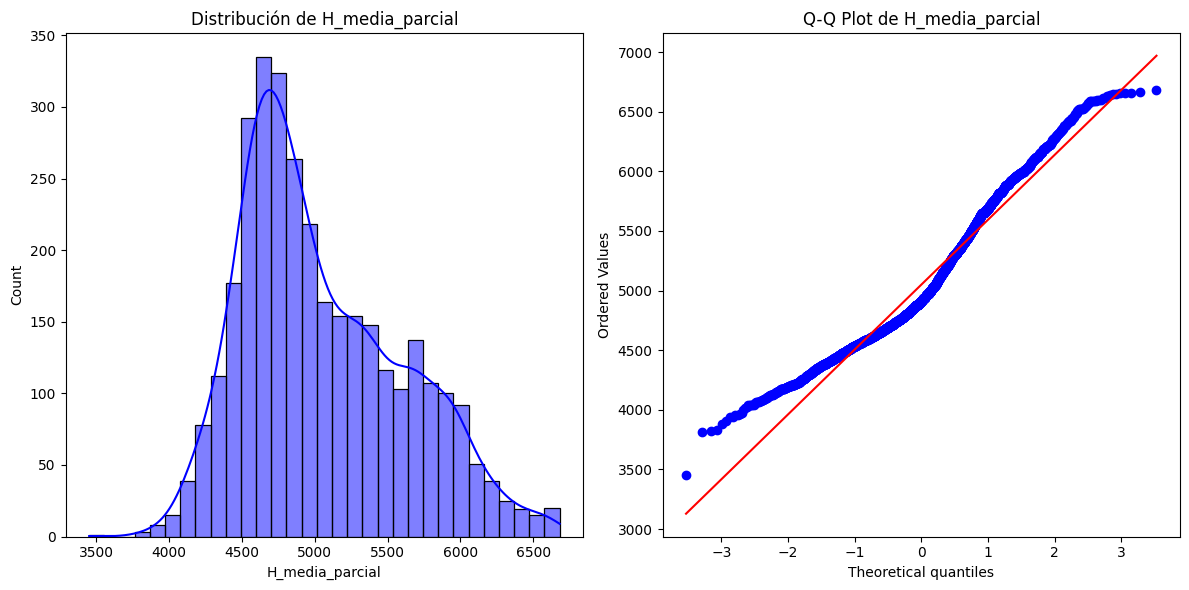

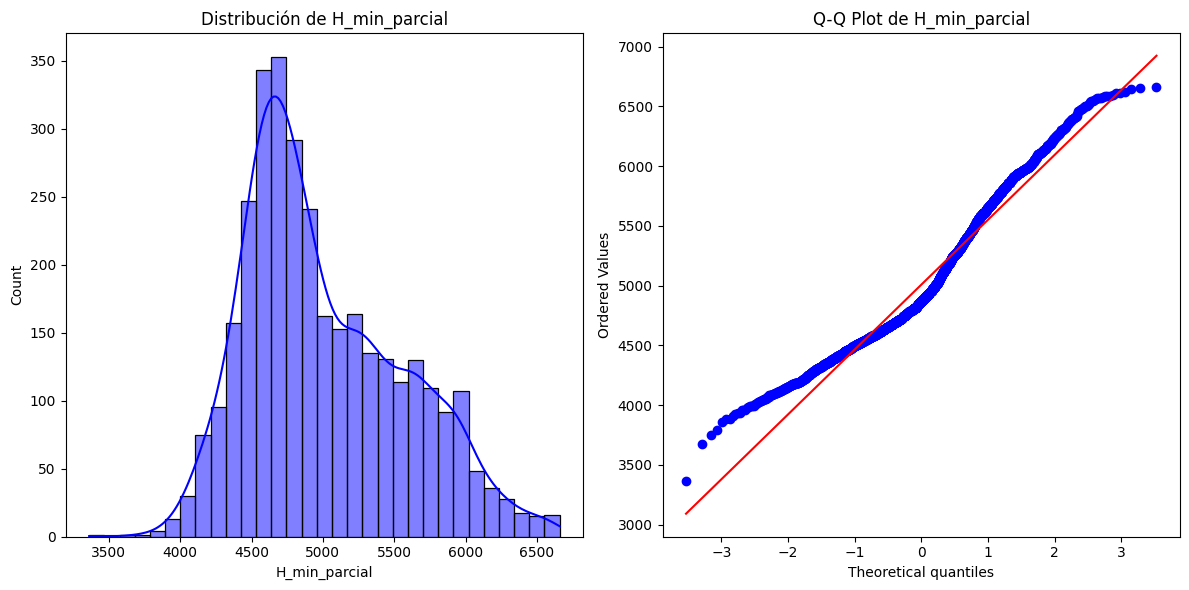

In [38]:
numeric_features = ['Area', 'Largo_total', 'H_max_total', 'H_media_total', 'H_min_total', 'Pendiente', 'H_max_parcial', 'H_media_parcial', 'H_min_parcial']

# Gráficos de distribución y Q-Q plot
def plot_distribution(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f"Distribución de {feature}")

    plt.subplot(1, 2, 2)
    stats.probplot(data[feature].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {feature}")

    plt.tight_layout()
    plt.show()

# Gráfico de todas las columnas numéricas
for feature in numeric_features:
    plot_distribution(df3_filtrado, feature)

Los features y `Area` y `Largo_total`, aún luego de la eliminación de outliers y consecuente reducción del volumen de datos, siguen evidenciando un comportamiento distante de la normalidad que se incrementa con la disminución del umbral en el z-score. Por lo que decimos seguir trabajando con los resultados luego de aplicar el z-score con un umbral de 3 aunque presente outliers, ya que estas variables al ser de diferentes geoformas y encontrarse en territorios tan diversos, como las provincias, pueden variar contundentemente entre distintas regiones y altitudes. Este análisis es un buen puntapie para seguir trabajando en el análisis de los datos teniendo en cuenta distintos parámetros. Por lo lado, los otros features, como los relacionados a las alturas parciales y totales de los glaciares, así como los de pendiente, mejoraron su comportamiento, al tener Q-Q plot con una distribución más ajustada a la recta de normalidad.

## Estandarización

### Transformación de variables

Binning

In [39]:
# Categorizamos el feature Área en 3 clases, de acuerdo al tamaño de la misma

q1 = df3_filtrado['Area'].quantile(0.25) #Área menor a q1 -> A_pequeño

q3 = df3_filtrado['Area'].quantile(0.75) #Área mayor a q3 -> A_grande

df4=df3_filtrado.copy()
df4['Area'] = pd.cut(df3_filtrado['Area'], bins=[df3_filtrado['Area'].min(), q1, q3, df2['Area'].max()], labels=['A_pequeño', 'A_media', 'A_grande'], include_lowest=True,duplicates='drop')
df4['Area']

0        A_media
1        A_media
2       A_grande
3       A_grande
4       A_grande
          ...   
3375    A_grande
3376    A_grande
3377     A_media
3378     A_media
3379     A_media
Name: Area, Length: 3310, dtype: category
Categories (3, object): ['A_pequeño' < 'A_media' < 'A_grande']

In [40]:
test_encoder = LabelEncoder()

Transformación de variables categóricas a numéricas


In [41]:
# Con un bucle realizamos de forma simultanea la transformación de variables categóricas a numéricas
label_encoders = {}
for col in ['Provincia', 'Cuenca','Subcuenca','Codigo_cuenca','ID_local','Tipo_geoforma','Orientacion','Img_ba_F','Img_ba_S','Area']:
    le = LabelEncoder()
    df4[col] = le.fit_transform(df4[col])
    label_encoders[col] = le
df4


Provincia  Cuenca  Subcuenca  Codigo_cuenca  ID_local  Tipo_geoforma  \
0             0      10          0             14      1306              4   
1             0      10          0             14      1312              4   
2             2       7         17              5      1829              4   
3             2       7         17              5      1876              4   
4             2       7         17              5      1834              4   
...         ...     ...        ...            ...       ...            ...   
3375          4       3          7              9      2282              0   
3376          4       3          7              9      2778              0   
3377          4       3          7              9      2335              3   
3378          4       3          7              9      2575              3   
3379          4       3          7              9      2489              0   

      Clas_prima  Origen_GE  Act_GE  Forma_GE  ...  H_media_total  \
0              7       -1.0    -1.0      -1.0  ...    5295.400000   
1              7       -1.0    -1.0      -1.0  ...    5295.400000   
2              7       -1.0    -1.0      -1.0  ...    5648.555133   
3              7       -1.0    -1.0      -1.0  ...    5648.555133   
4              7       -1.0    -1.0      -1.0  ...    5648.555133   
...          ...        ...     ...       ...  ...            ...   
3375           6       -1.0    -1.0      -1.0  ...    5105.000000   
3376           6       -1.0    -1.0      -1.0  ...    4836.000000   
3377           7       -1.0    -1.0      -1.0  ...    5915.000000   
3378           6       -1.0    -1.0      -1.0  ...    4868.000000   
3379           6       -1.0    -1.0      -1.0  ...    4922.000000   

      H_min_total  Pendiente  Orientacion  H_max_parcial  H_media_parcial  \
0     5261.880000  22.304160            5    5328.640000      5295.240000   
1     5261.880000  22.304160            5    5328.640000      5295.240000   
2     5608.068441  15.612494            6    5688.110266      5648.494297   
3     5608.068441  15.612494            6    5688.110266      5648.494297   
4     5608.068441  15.612494            6    5688.110266      5648.494297   
...           ...        ...          ...            ...              ...   
3375  4953.000000  19.748000            6    5089.000000      5000.000000   
3376  4686.000000  23.951000            5    4836.000000      4748.000000   
3377  5901.000000   9.868000            5    5931.000000      5915.000000   
3378  4640.000000  19.097000            5    5113.000000      5113.000000   
3379  4688.000000  21.692000            0    4839.000000      4755.000000   

      H_min_parcial  Img_ba_F  Img_ba_S           Img_ap_S  
0       5263.520000         5         0        Desconocido  
1       5263.520000         5         0        Desconocido  
2       5611.326996         8         0        Desconocido  
3       5611.326996         8         0        Desconocido  
4       5611.326996         8         0        Desconocido  
...             ...       ...       ...                ...  
3375    4953.000000         3         0  Bing/Google Earth  
3376    4686.000000         3         0  Bing/Google Earth  
3377    5901.000000         3         0        Desconocido  
3378    5112.000000         3         0        Desconocido  
3379    4688.000000         3         0  Bing/Google Earth  

[3310 rows x 27 columns]

Glosario los datos trasnformados en cada feature

In [42]:
# Con un bucle realizamos de forma simultanea visualizamos la descripción de asignación de variables numéricas a categóricas (glosario)
for col in ['Provincia', 'Cuenca','Subcuenca','Codigo_cuenca','Tipo_geoforma','Orientacion','Img_ba_F','Img_ba_S','Area']:
    print(f"Glosario para el feature '{col}':")
    for idx, clase in enumerate(label_encoders[col].classes_):
        print(f"  {idx}: {clase}")
    print()

Glosario para el feature 'Provincia':
  0: Catamarca
  1: Jujuy
  2: La Rioja
  3: Salta
  4: San Juan
  5: Tucumán

Glosario para el feature 'Cuenca':
  0: Alta cuenca del rio Juramento
  1: R. Abaucán y L. Verde
  2: R. Bermejo
  3: R. Jáchal
  4: R. Pilcomayo
  5: R. Salí - Dulce
  6: R. San Francisco
  7: R. Vinchina-Bermejo
  8: Salar de Pipanaco
  9: Varias de Velazco
  10: Varias de la Puna

Glosario para el feature 'Subcuenca':
  0: Antofagasta de las Sierras
  1: L. Verde
  2: L. Vilama, Catal, Pululos
  3: L. de los Aparejos
  4: R. Abaucán
  5: R. Andalgalá
  6: R. Blanco
  7: R. Blanco Inferior
  8: R. Blanco Superior
  9: R. Calchaquí
  10: R. Condado
  11: R. Iruya
  12: R. Pescado Superior
  13: R. Pilcomayo
  14: R. Rosario
  15: R. San Francisco
  16: R. Santa María
  17: R. Vinchina-Bermejo
  18: R. Vipos, Lules, Balderrama, Gastona y Medinas
  19: R. de la Palca
  20: S. Olaroz
  21: Salar Arizaro
  22: Salar Pocito
  23: Salar de Antofalla
  24: Salar de Cauchari
  

Convertimos datos categóricos a booleanos con get dummies para el feature `Img_ap_S`

In [43]:
df4_gd=pd.get_dummies(df4, columns=['Img_ap_S'])

In [44]:
# Verificamos que el df tenga solo datos numéricos:

df4_gd.dtypes

Provincia                       int64
Cuenca                          int64
Subcuenca                       int64
Codigo_cuenca                   int64
ID_local                        int64
Tipo_geoforma                   int64
Clas_prima                      int64
Origen_GE                     float64
Act_GE                        float64
Forma_GE                      float64
Estruct_I                     float64
Estruct_II                    float64
Longitud                      float64
Latitud                       float64
Area                            int64
Largo_total                   float64
H_max_total                   float64
H_media_total                 float64
H_min_total                   float64
Pendiente                     float64
Orientacion                     int64
H_max_parcial                 float64
H_media_parcial               float64
H_min_parcial                 float64
Img_ba_F                        int64
Img_ba_S                        int64
Img_ap_S_Bing/Google Earth       bool
Img_ap_S_Desconocido             bool
dtype: object

### Creación de archico .CSV final - limpio

In [45]:
df4_gd.to_csv('Glaciares_final.csv', index=False)

##Descargar el .CSV usando Google Colab
Si no ejecutamos este código el csv queda en la nube.

In [46]:
from google.colab import files
files.download('Glaciares_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gráficos

## Análisis de correlación

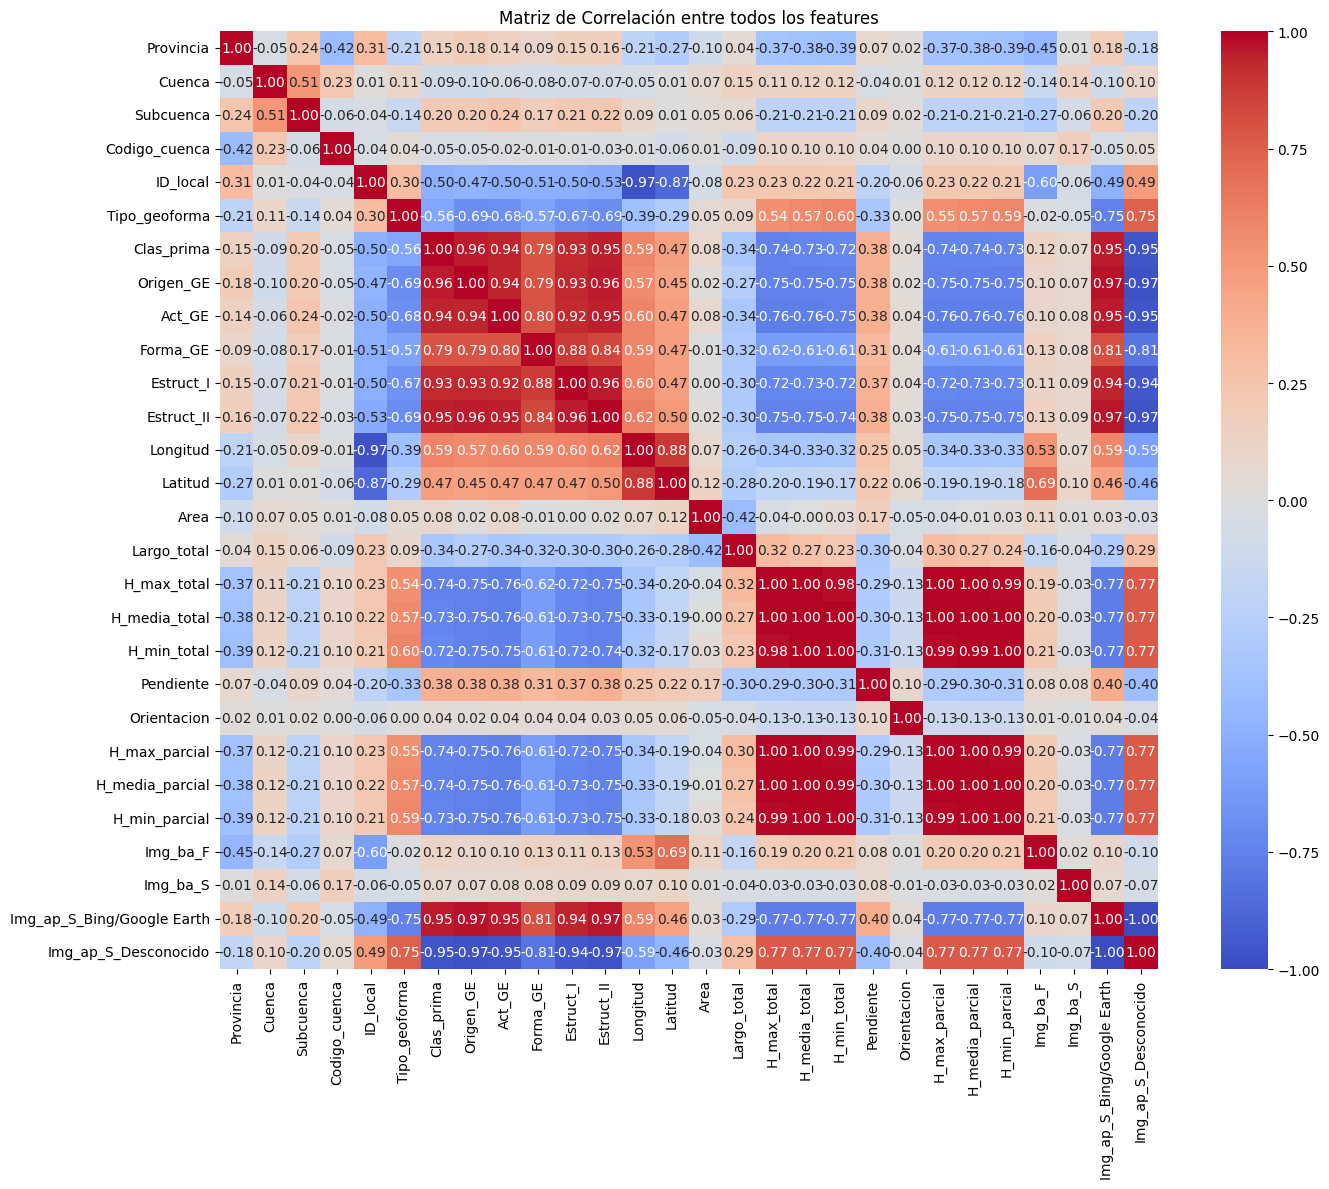

In [47]:
# Creamos una matriz de correlación (heatmap)

correlation_matrix = df4_gd.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre todos los features')
plt.tight_layout()
plt.show()

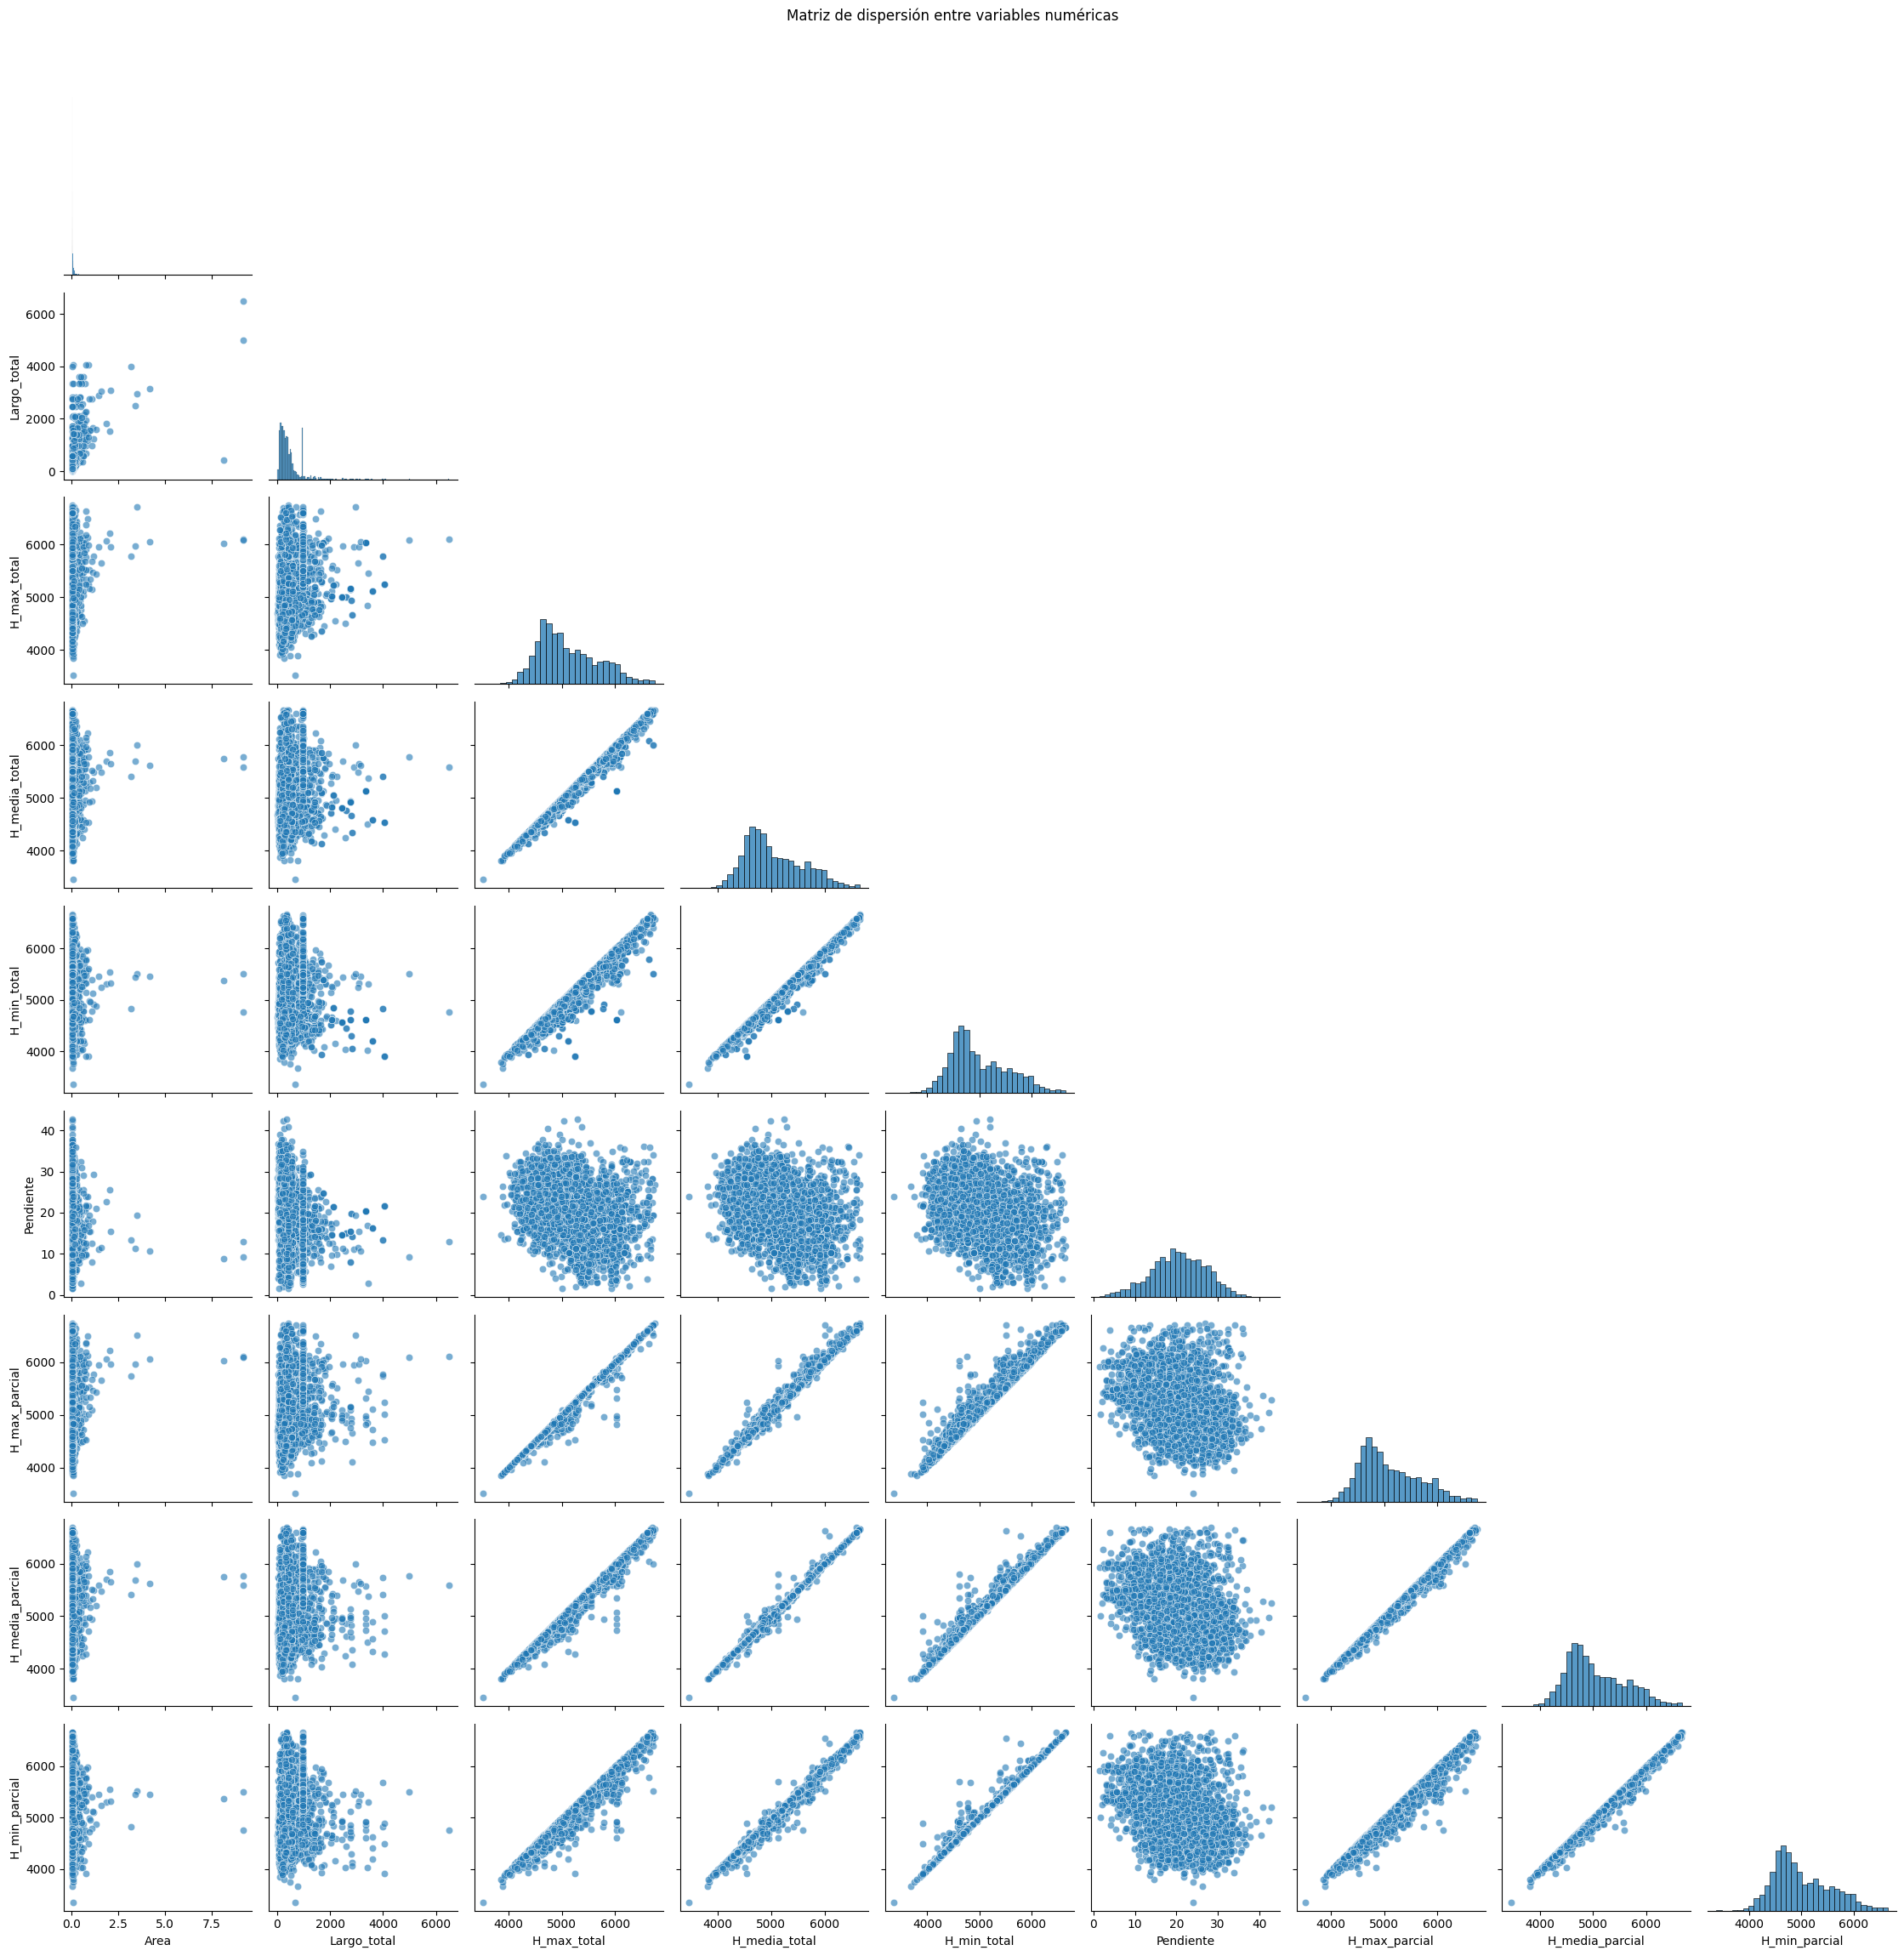

In [48]:
sns.pairplot(df3[numeric_features], corner=True, plot_kws={'alpha': 0.6}) #Usamos df3 para evitar trabajar con las variables originalmente categóricas (facilíta la visualizción)
# numeric_features excluye los features categóricos
plt.suptitle('Matriz de dispersión entre variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

**Interpretación de gráficos de correlación entre variables**

Tanto el heatmap como el gráfico realizado por seaborn arrojaron correlación de 1 o muy cercana a una entre los features altura mínima, media y máxima tanto parcial o total entre las diferentes geoformas a lo largo de los Andes Desérticos de Argentina. Los que menos se correlacionan con los otros features área, pendiente y orientación, por ejemplo. Siendo la pendiente la que tiene un comportamiento más caótico, en cuanto a la correlación.
Estos datos son sirven para que cuando, más adelante, nos adentremos en el análisis relacionado con ML no caigamos en redundancias -si dos o más variables están altamente correlacionadas (ej. alturas parciales y totales)- o para saber que variables no se correlacionan con la variable objeto y son irrelevantes para el modelo.

**Representación de la variabilidad del volumen de datos recolectados de acuerdo a su localización**

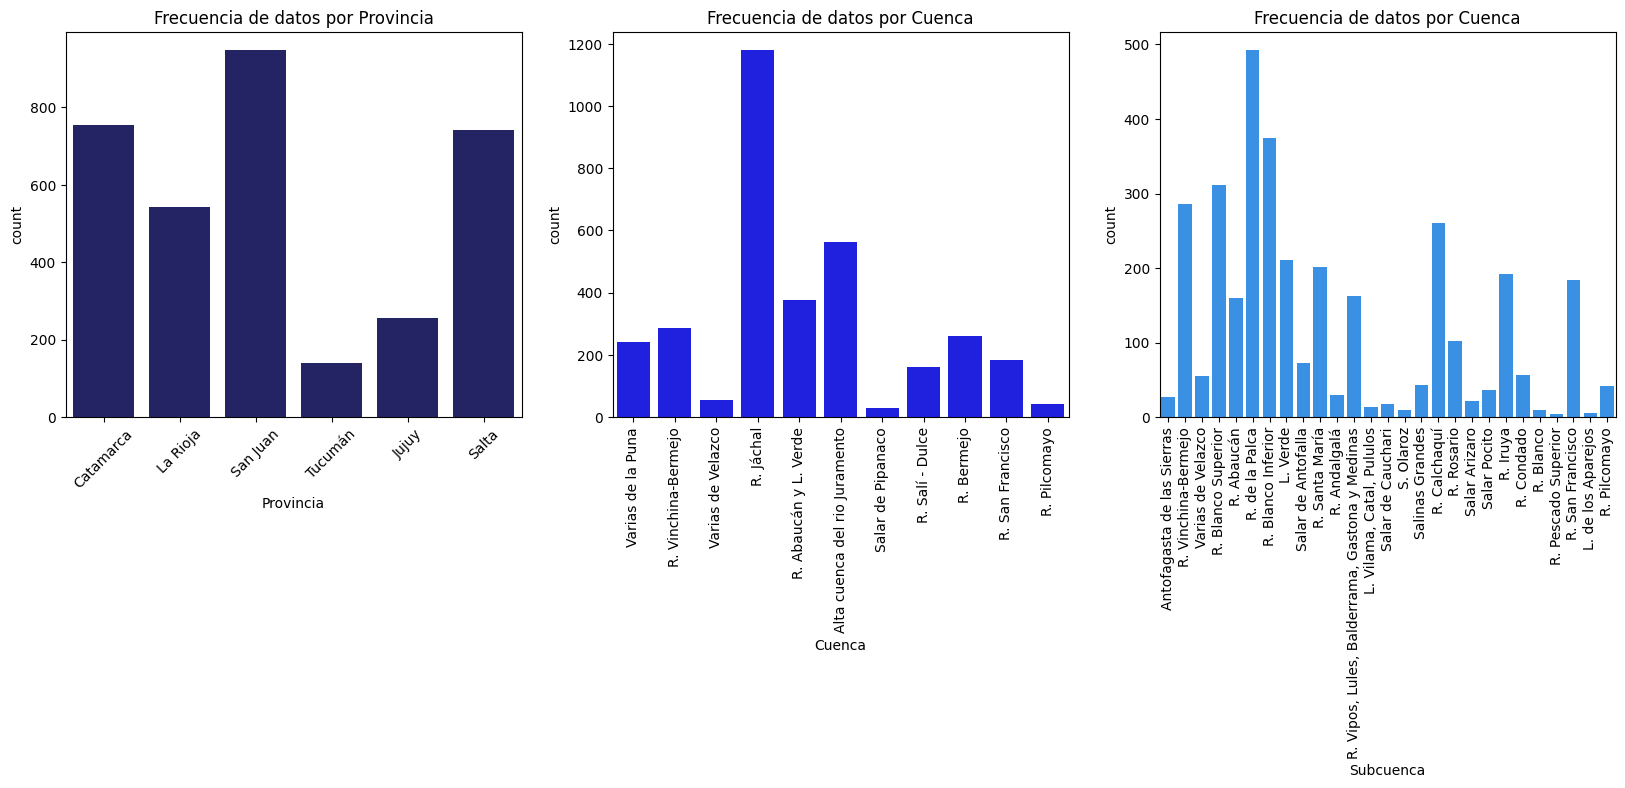

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  #Dos gráficos en una fila


sns.countplot(data=df3, x='Provincia', color='midnightblue', ax=axes[0])
axes[0].set_title('Frecuencia de datos por Provincia')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df3, x='Cuenca', color='blue', ax=axes[1])
axes[1].set_title('Frecuencia de datos por Cuenca')
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(data=df3, x='Subcuenca', color='dodgerblue', ax=axes[2])
axes[2].set_title('Frecuencia de datos por Cuenca')
axes[2].tick_params(axis='x', rotation=90)


Caro, te agradecemos cualquier tipo de aporte, crítica o comentario sobre la notebook.

Que estés bien.

Saludos,

Brenda y Erika
⛰